In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prrtc_data = pd.read_csv(
    "/home/pranav/gpu-planning/paraplan/test_output/panda_512_32_1.0_2_1.0_1_4.0_1.0_0.0001_main_2.csv"
)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]


vamp_data = pd.read_csv(
    "/home/pranav/gpu-planning/vamp/results_panda_rrtc_r1.0_iters1e9.csv"
)

In [3]:
prrtc_data[prrtc_data["solved"] == 0].shape

(0, 25)

In [4]:
prrtc_data[prrtc_data["vamp_valid"] == 0]

,problem_name,problem_idx,solved,vamp_valid,cost,path_length,start_tree_size,goal_tree_size,iters,wall_ns,...,balance,tree_ratio,dynamic_domain,dd_alpha,dd_radius,dd_min_radius,kernel_us,wall_us,copy_us,kernel_copy_us


In [5]:
prrtc_data.shape, vamp_data.shape

((699, 25), (699, 13))

In [8]:
prrtc_data[prrtc_data["problem_name"] == "cage"].sort_values("kernel_copy_us")

,problem_name,problem_idx,solved,vamp_valid,cost,path_length,start_tree_size,goal_tree_size,iters,wall_ns,...,balance,tree_ratio,dynamic_domain,dd_alpha,dd_radius,dd_min_radius,kernel_us,wall_us,copy_us,kernel_copy_us
483,cage,84,1,1,6.57279,7,517,138,16,15719288,...,2,1,1,0.0001,4,1,661.718,15719.288,38.202,699.920
499,cage,100,1,1,6.33446,7,517,134,7,15246958,...,2,1,1,0.0001,4,1,681.566,15246.958,38.012,719.578
489,cage,90,1,1,6.45182,7,552,93,46,15302473,...,2,1,1,0.0001,4,1,690.092,15302.473,38.342,728.434
406,cage,7,1,1,6.49516,7,507,237,9,15038025,...,2,1,1,0.0001,4,1,691.054,15038.025,38.513,729.567
424,cage,25,1,1,6.65653,7,659,577,10,15438219,...,2,1,1,0.0001,4,1,695.783,15438.219,37.451,733.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,cage,70,1,1,9.81060,10,806,137,21,15573735,...,2,1,1,0.0001,4,1,1231.824,15573.735,39.475,1271.299
490,cage,91,1,1,8.68479,9,701,425,24,15826331,...,2,1,1,0.0001,4,1,1246.251,15826.331,37.811,1284.062
484,cage,85,1,1,9.08626,10,688,531,15,31539117,...,2,1,1,0.0001,4,1,1259.996,31539.117,39.244,1299.240
400,cage,1,1,1,9.90473,10,518,185,15,15723568,...,2,1,1,0.0001,4,1,1266.339,15723.568,38.613,1304.952


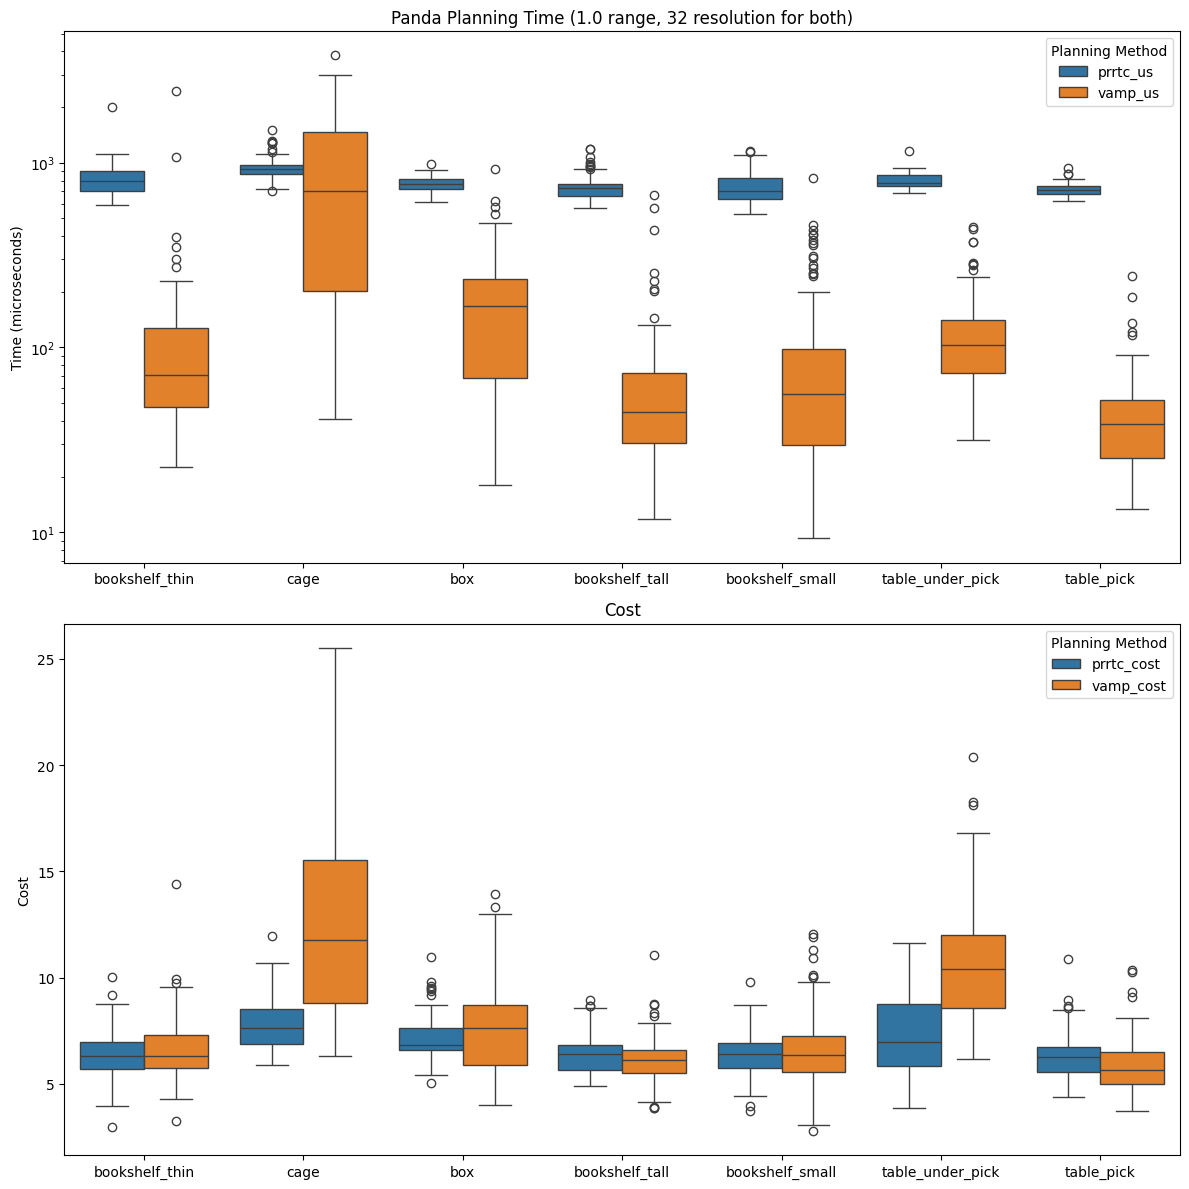

In [7]:


combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])
combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
combined_data["vamp_us"] = combined_data["planning_time"]
combined_data["prrtc_cost"] = combined_data["cost"]
combined_data["vamp_cost"] = combined_data["initial_path_cost"]

# Reshape data
melted_time_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_us", "vamp_us"], var_name="Time Type", value_name="Time (microseconds)")
melted_cost_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_cost", "vamp_cost"], var_name="Cost Type", value_name="Cost")
# Box plot of planning time and cost

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
sns.boxplot(x="problem_name", y="Time (microseconds)", hue="Time Type", data=melted_time_data, ax=ax[0])
sns.boxplot(x="problem_name", y="Cost", hue="Cost Type", data=melted_cost_data, ax=ax[1])
ax[0].set_title("Panda Planning Time (1.0 range, 32 resolution for both)")
ax[0].set_ylabel("Time (microseconds)")
ax[0].set_xlabel("")
ax[0].legend(title="Planning Method")
ax[0].set_yscale("log")

ax[1].set_title("Cost")
ax[1].set_xlabel("")
ax[1].set_ylabel("Cost")
ax[1].legend(title="Planning Method")
plt.tight_layout()







In [8]:
prrtc_data[prrtc_data["problem_name"] == "bookshelf_thin"].sort_values("kernel_us", ascending=False)

,problem_name,problem_idx,solved,vamp_valid,cost,path_length,start_tree_size,goal_tree_size,iters,wall_ns,...,balance,tree_ratio,dynamic_domain,dd_alpha,dd_radius,dd_min_radius,kernel_us,wall_us,copy_us,kernel_copy_us
288,bookshelf_thin,89,1,1,8.75700,10,1536,1376,320,16404050,...,2,1,1,0.0001,4,1,1973.683,16404.050,38.152,2011.835
251,bookshelf_thin,52,1,1,10.01860,11,1203,1087,49,15713378,...,2,1,1,0.0001,4,1,1072.874,15713.378,39.064,1111.938
275,bookshelf_thin,76,1,1,9.16475,10,1268,1010,35,15544209,...,2,1,1,0.0001,4,1,1069.598,15544.209,38.132,1107.730
205,bookshelf_thin,6,1,1,7.54289,8,992,820,46,15381462,...,2,1,1,0.0001,4,1,1032.187,15381.462,37.130,1069.317
277,bookshelf_thin,78,1,1,6.40491,7,843,919,9,15570148,...,2,1,1,0.0001,4,1,1031.336,15570.148,37.831,1069.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,bookshelf_thin,97,1,1,6.26095,7,1268,889,2,14985676,...,2,1,1,0.0001,4,1,584.322,14985.676,37.420,621.742
232,bookshelf_thin,33,1,1,4.92850,5,1542,898,1,15043093,...,2,1,1,0.0001,4,1,582.128,15043.093,36.789,618.917
215,bookshelf_thin,16,1,1,3.96823,4,1106,1067,1,15067540,...,2,1,1,0.0001,4,1,578.351,15067.540,38.373,616.724
258,bookshelf_thin,59,1,1,4.84415,5,1025,591,2,15222442,...,2,1,1,0.0001,4,1,561.789,15222.442,39.134,600.923


In [9]:
prrtc_data[prrtc_data["problem_name"] == "bookshelf_thin"]["kernel_us"].describe()

count     100.000000
mean      780.711840
std       178.010619
min       551.961000
25%       663.774750
50%       758.596000
75%       866.136500
max      1973.683000
Name: kernel_us, dtype: float64

In [10]:
prrtc_data.sort_values("kernel_us", ascending=False)

,problem_name,problem_idx,solved,vamp_valid,cost,path_length,start_tree_size,goal_tree_size,iters,wall_ns,...,balance,tree_ratio,dynamic_domain,dd_alpha,dd_radius,dd_min_radius,kernel_us,wall_us,copy_us,kernel_copy_us
288,bookshelf_thin,89,1,1,8.75700,10,1536,1376,320,16404050,...,2,1,1,0.0001,4,1,1973.683,16404.050,38.152,2011.835
447,cage,48,1,1,11.98320,13,520,254,15,16094536,...,2,1,1,0.0001,4,1,1455.265,16094.536,39.084,1494.349
400,cage,1,1,1,9.90473,10,518,185,15,15723568,...,2,1,1,0.0001,4,1,1266.339,15723.568,38.613,1304.952
484,cage,85,1,1,9.08626,10,688,531,15,31539117,...,2,1,1,0.0001,4,1,1259.996,31539.117,39.244,1299.240
490,cage,91,1,1,8.68479,9,701,425,24,15826331,...,2,1,1,0.0001,4,1,1246.251,15826.331,37.811,1284.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,bookshelf_small,27,1,1,5.84474,6,1170,803,2,15043484,...,2,1,1,0.0001,4,1,515.001,15043.484,42.940,557.941
79,bookshelf_small,80,1,1,5.69838,6,1295,706,2,15279540,...,2,1,1,0.0001,4,1,514.230,15279.540,37.411,551.641
23,bookshelf_small,24,1,1,5.68509,6,1537,688,2,16334069,...,2,1,1,0.0001,4,1,502.247,16334.069,37.761,540.008
86,bookshelf_small,87,1,1,5.79419,6,1025,955,2,14914340,...,2,1,1,0.0001,4,1,499.803,14914.340,38.683,538.486


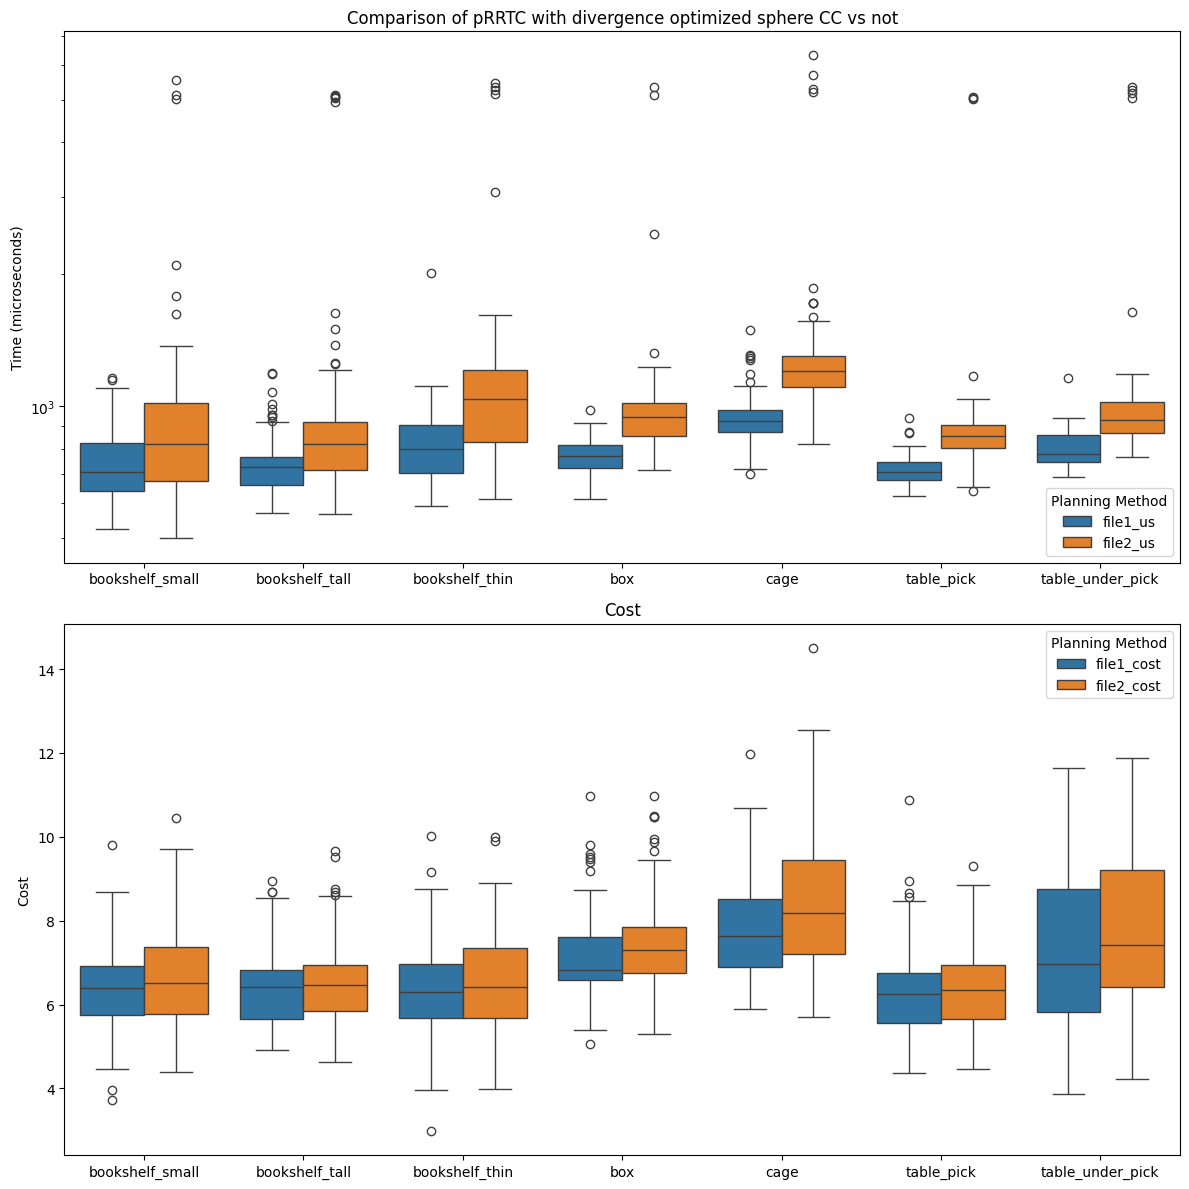

In [11]:
# Code block to compare two prrt data files
file1 = "/home/pranav/gpu-planning/paraplan/test_output/panda_512_32_1.0_2_1.0_1_4.0_1.0_0.0001_main_2.csv"
file2 = "/home/pranav/gpu-planning/paraplan/test_output/panda_pRRTC_512_32_1.0_2_1.0_1_4.0_1.0_0.0001_main_1.csv"
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

data1["kernel_us"] = data1["kernel_ns"] / 1000
data1["wall_us"] = data1["wall_ns"] / 1000
data1["copy_us"] = data1["copy_ns"] / 1000
data1["kernel_copy_us"] = data1["kernel_us"] + prrtc_data["copy_us"]

data2["kernel_us"] = data2["kernel_ns"] / 1000
data2["wall_us"] = data2["wall_ns"] / 1000
data2["copy_us"] = data2["copy_ns"] / 1000
data2["kernel_copy_us"] = data2["kernel_us"] + prrtc_data["copy_us"]


combined_data = data1.merge(data2, how="right", on=["problem_name", "problem_idx"])
combined_data["file1_us"] = combined_data["kernel_copy_us_x"]
combined_data["file2_us"] = combined_data["kernel_copy_us_y"]
combined_data["file1_cost"] = combined_data["cost_x"]
combined_data["file2_cost"] = combined_data["cost_y"]

# Reshape data
melted_time_data = combined_data.melt(id_vars=["problem_name"], value_vars=["file1_us", "file2_us"], var_name="Time Type", value_name="Time (microseconds)")
melted_cost_data = combined_data.melt(id_vars=["problem_name"], value_vars=["file1_cost", "file2_cost"], var_name="Cost Type", value_name="Cost")
# Box plot of planning time and cost

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
sns.boxplot(x="problem_name", y="Time (microseconds)", hue="Time Type", data=melted_time_data, ax=ax[0])
sns.boxplot(x="problem_name", y="Cost", hue="Cost Type", data=melted_cost_data, ax=ax[1])
ax[0].set_title("Comparison of pRRTC with divergence optimized sphere CC vs not")
ax[0].set_ylabel("Time (microseconds)")
ax[0].set_xlabel("")
ax[0].legend(title="Planning Method")
ax[0].set_yscale("log")

ax[1].set_title("Cost")
ax[1].set_xlabel("")
ax[1].set_ylabel("Cost")
ax[1].legend(title="Planning Method")
plt.tight_layout()







In [12]:
prrtc_data["copy_us"].describe()

count    699.000000
mean      38.335113
std        1.049263
min       35.657000
25%       37.801000
50%       38.202000
75%       38.683000
max       46.638000
Name: copy_us, dtype: float64

## Curobo stuff

In [13]:
# import pickle
# with open('/home/pranav/gpu-planning/curobo/curobo_3__custom_data.pkl', 'rb') as f:
#     data = pickle.load(f)

# rows = []
# for scene, problems in data.items():
#     for index, problem in enumerate(problems):
#         problem_data = problem.copy()
#         problem_data['problem_name'] = scene.split('_panda')[0]
#         problem_data['problem_idx'] = index + 1
#         rows.append(problem_data)

# curobo_data = pd.DataFrame(rows)

In [14]:
# prrtc_data = pd.read_csv(
#     "/home/pranav/gpu-planning/paraplan/test_output/panda_pRRTC_512_32_1.0_2_1.0_1_dd_4.0_1.0_0.0001.csv"
# )
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]


# vamp_data = pd.read_csv(
#     "/home/pranav/gpu-planning/vamp/results_panda_rrtc_r1.0_iters1e9.csv"
# )

# vamp_data.shape, prrtc_data.shape

In [15]:


# combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])
# combined_data = combined_data.merge(curobo_data, how="right", on=["problem_name", "problem_idx"])

# combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
# combined_data["vamp_us"] = combined_data["planning_time"]
# combined_data["curobo_us"] = combined_data["solve_time"] * 1e6
# combined_data["prrtc_cost"] = combined_data["cost"]
# combined_data["vamp_cost"] = combined_data["initial_path_cost"]
# combined_data["curobo_cost"] = combined_data["cspace_path_length"]

# # Reshape data
# melted_time_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_us", "vamp_us", "curobo_us"], var_name="Time Type", value_name="Time (microseconds)")
# melted_cost_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_cost", "vamp_cost", "curobo_cost"], var_name="Cost Type", value_name="Cost")
# # Box plot of planning time and cost

# fig, ax = plt.subplots(2, 1, figsize=(12, 12))
# sns.boxplot(x="problem_name", y="Time (microseconds)", hue="Time Type", data=melted_time_data, ax=ax[0])
# sns.boxplot(x="problem_name", y="Cost", hue="Cost Type", data=melted_cost_data, ax=ax[1])
# ax[0].set_title("Panda Planning Time\n 1.0 range, 32 resolution for prrtc and vamp, curobo set to geom planner only mode")
# ax[0].set_ylabel("Time (microseconds)")
# ax[0].set_xlabel("")
# ax[0].legend(title="Planning Method")
# ax[0].set_yscale("log")

# ax[1].set_title("Cost")
# ax[1].set_xlabel("")
# ax[1].set_ylabel("Cost")
# ax[1].legend(title="Planning Method")
# plt.tight_layout()







# Final Plots

(506, 84)


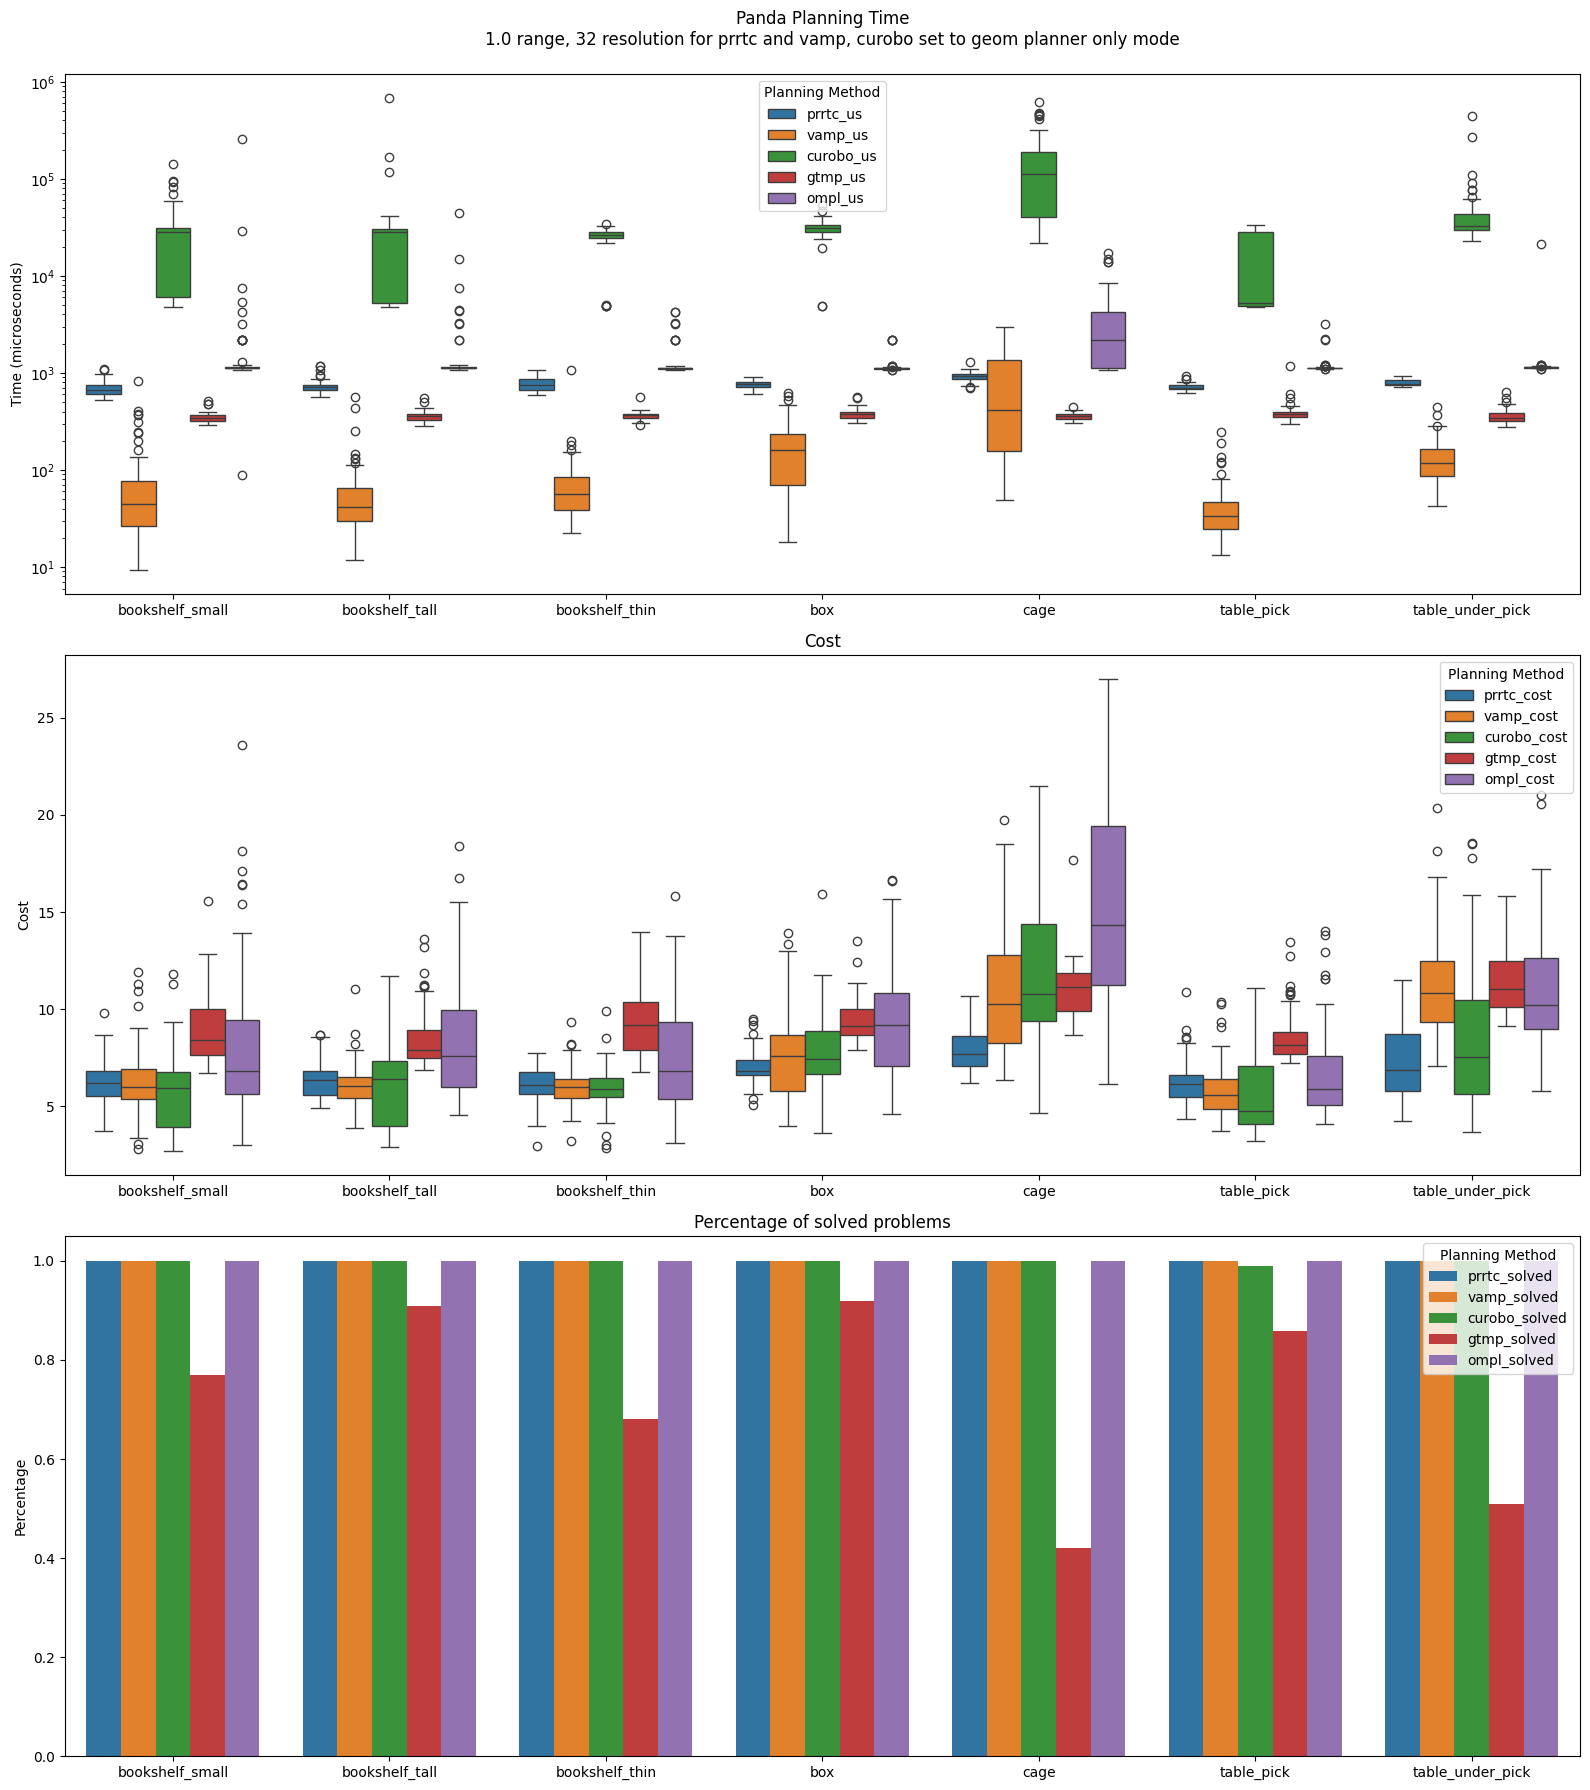

In [16]:
import pickle

prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/panda_512_32_1.0_2_1.0_1_4.0_1.0_0.0001_main_2.csv"
vamp_data_path = "/home/pranav/gpu-planning/vamp/results_panda_rrtc_r1.0_iters1e9.csv"
gtmp_data_path = '/home/pranav/gpu-planning/gtmp/results_5_100_2_10_akima.pkl'
curobo_data_path = '/home/pranav/gpu-planning/curobo/curobo_3__custom_data.pkl'
ompl_data_path = '/home/pranav/gpu-planning/ompl_benching1/vamp/ompl_panda_r1.0.csv'

with open(gtmp_data_path, 'rb') as f:
    data = pickle.load(f)
gtmp_data = pd.DataFrame(data)
gtmp_data.rename(columns={"solved": "gtmp_solved"}, inplace=True)

with open(curobo_data_path, 'rb') as f:
    data = pickle.load(f)
rows = []
for scene, problems in data.items():
    for index, problem in enumerate(problems):
        problem_data = problem.copy()
        problem_data['problem_name'] = scene.split('_panda')[0]
        problem_data['problem_idx'] = index + 1
        rows.append(problem_data)
curobo_data = pd.DataFrame(rows)
curobo_data.rename(columns={"success": "curobo_solved"}, inplace=True)

ompl_data = pd.read_csv("/home/pranav/gpu-planning/ompl_benching1/vamp/ompl_panda_r1.0.csv")
ompl_data.rename(columns={"solved": "ompl_solved"}, inplace=True)

prrtc_data = pd.read_csv(prrtc_data_path)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)


vamp_data = pd.read_csv(vamp_data_path)
vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)

combined_data = prrtc_data.merge(vamp_data[vamp_data["vamp_solved"] == True], how="right", on=["problem_name", "problem_idx"])
combined_data = combined_data.merge(curobo_data[curobo_data["curobo_solved"] == True], how="right", on=["problem_name", "problem_idx"])
combined_data = combined_data.merge(ompl_data[ompl_data["ompl_solved"] == True], how="right", on=["problem_name", "problem_idx"])
combined_data = combined_data.merge(gtmp_data[gtmp_data["gtmp_solved"] == True], how="right", on=["problem_name", "problem_idx"])

combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
combined_data["vamp_us"] = combined_data["planning_time"]
combined_data["curobo_us"] = combined_data["solve_time"] * 1e6
combined_data["gtmp_us"] = combined_data["time_us"]
combined_data['ompl_us'] = combined_data['solution_nanoseconds'] / 1e3

combined_data["prrtc_cost"] = combined_data["cost"]
combined_data["vamp_cost"] = combined_data["initial_path_cost"]
combined_data["curobo_cost"] = combined_data["cspace_path_length"]
combined_data["gtmp_cost"] = combined_data["avg_path_len"]
combined_data["ompl_cost"] = combined_data["initial_cost"]

print(combined_data.shape)

# Reshape data
melted_time_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_us", "vamp_us", "curobo_us", "gtmp_us", "ompl_us"], var_name="Time Type", value_name="Time (microseconds)")
melted_cost_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_cost", "vamp_cost", "curobo_cost", "gtmp_cost", "ompl_cost"], var_name="Cost Type", value_name="Cost")
# Box plot of planning time and cost

fig, ax = plt.subplots(3, 1, figsize=(16, 18))
palette = "tab10"
sns.boxplot(x="problem_name", y="Time (microseconds)", hue="Time Type", data=melted_time_data, ax=ax[0], palette=palette)
sns.boxplot(x="problem_name", y="Cost", hue="Cost Type", data=melted_cost_data, ax=ax[1], palette=palette)
ax[0].set_title(
    f"""Panda Planning Time
    1.0 range, 32 resolution for prrtc and vamp, curobo set to geom planner only mode
    """
)
ax[0].set_ylabel("Time (microseconds)")
ax[0].set_xlabel("")
ax[0].legend(title="Planning Method")
ax[0].set_yscale("log")

ax[1].set_title("Cost")
ax[1].set_xlabel("")
ax[1].set_ylabel("Cost")
ax[1].legend(title="Planning Method")

# Plot percentage of solved problems for each method
all_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])
all_data = all_data.merge(curobo_data, how="right", on=["problem_name", "problem_idx"])
all_data = all_data.merge(ompl_data, how="right", on=["problem_name", "problem_idx"])
all_data = all_data.merge(gtmp_data, how="right", on=["problem_name", "problem_idx"])

solved_data = all_data.groupby("problem_name")[[f"{method}_solved" for method in ["prrtc", "vamp", "curobo", "gtmp", "ompl"]]].mean()
melted_solved_data = solved_data.reset_index().melt(id_vars="problem_name", var_name="method", value_name="solved_ratio")
sns.barplot(data=melted_solved_data, x="problem_name", y="solved_ratio", hue="method", palette=palette, ax=ax[2])
ax[2].set_title("Percentage of solved problems")
ax[2].set_ylabel("Percentage")
ax[2].set_xlabel("")
ax[2].legend(title="Planning Method")

plt.tight_layout()







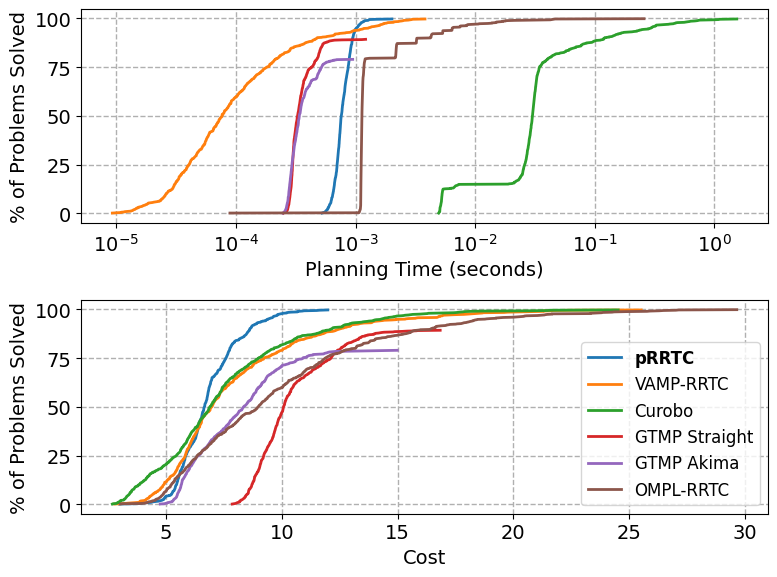

In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# increase font size
plt.rcParams.update({'font.size': 14})

prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/panda_512_32_1.0_2_1.0_1_4.0_1.0_0.0001_main_2.csv"
vamp_data_path = "/home/pranav/gpu-planning/vamp/results_panda_rrtc_r1.0_iters1e9.csv"
gtmp_straight_data_path = '/home/pranav/gpu-planning/gtmp/panda_results_50_30_2_10_straight.pkl'
gtmp_akima_data_path = '/home/pranav/gpu-planning/gtmp/panda_results_50_200_1_10_akima.pkl'
# curobo_data_path = '/home/pranav/gpu-planning/curobo/curobo_3__custom_data.pkl'
curobo_data_path = '/home/pranav/gpu-planning/curobo/curobo_maxattempts100_timeout120_custom_data.pkl'
ompl_data_path = '/home/pranav/gpu-planning/ompl_benching1/vamp/ompl_panda_r1.0.csv'

# Load GTMP straight data
with open(gtmp_straight_data_path, 'rb') as f:
    data = pickle.load(f)
gtmp_straight_data = pd.DataFrame(data)
gtmp_straight_data.rename(columns={"solved": "gtmp_straight_solved"}, inplace=True)

# Load GTMP akima data
with open(gtmp_akima_data_path, 'rb') as f:
    data = pickle.load(f)
gtmp_akima_data = pd.DataFrame(data)
gtmp_akima_data.rename(columns={"solved": "gtmp_akima_solved"}, inplace=True)

with open(curobo_data_path, 'rb') as f:
    data = pickle.load(f)
rows = []
for scene, problems in data.items():
    for index, problem in enumerate(problems):
        problem_data = problem.copy()
        problem_data['problem_name'] = scene.split('_panda')[0]
        problem_data['problem_idx'] = index + 1
        rows.append(problem_data)
curobo_data = pd.DataFrame(rows)
curobo_data.rename(columns={"success": "curobo_solved"}, inplace=True)

ompl_data = pd.read_csv(ompl_data_path)
ompl_data.rename(columns={"solved": "ompl_solved"}, inplace=True)

prrtc_data = pd.read_csv(prrtc_data_path)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)

vamp_data = pd.read_csv(vamp_data_path)
vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)

combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])
combined_data = combined_data.merge(curobo_data, how="right", on=["problem_name", "problem_idx"])
combined_data = combined_data.merge(ompl_data, how="right", on=["problem_name", "problem_idx"])
combined_data = combined_data.merge(gtmp_straight_data, how="right", on=["problem_name", "problem_idx"])
combined_data = combined_data.merge(gtmp_akima_data, how="right", on=["problem_name", "problem_idx"])

combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
combined_data["vamp_us"] = combined_data["planning_time"]
combined_data["curobo_us"] = combined_data["solve_time"] * 1e6
combined_data["gtmp_straight_us"] = combined_data["time_us_x"]
combined_data["gtmp_akima_us"] = combined_data["time_us_y"]
combined_data['ompl_us'] = combined_data['solution_nanoseconds'] / 1e3

combined_data["prrtc_cost"] = combined_data["cost"]
combined_data["vamp_cost"] = combined_data["initial_path_cost"]
combined_data["curobo_cost"] = combined_data["cspace_path_length"]
combined_data["gtmp_straight_cost"] = combined_data["avg_path_len_x"]
combined_data["gtmp_akima_cost"] = combined_data["avg_path_len_y"]
combined_data["ompl_cost"] = combined_data["initial_cost"]

# Mapping of planners to their solved columns
solved_columns = {
    "prrtc_us": "prrtc_solved",
    "vamp_us": "vamp_solved",
    "curobo_us": "curobo_solved",
    "gtmp_straight_us": "gtmp_straight_solved",
    "gtmp_akima_us": "gtmp_akima_solved",
    "ompl_us": "ompl_solved",
}

# Mapping of solved column to planner name
planner_names = {
    "prrtc_solved": "pRRTC",
    "vamp_solved": "VAMP-RRTC",
    "curobo_solved": "Curobo",
    "gtmp_straight_solved": "GTMP Straight",
    "gtmp_akima_solved": "GTMP Akima",
    "ompl_solved": "OMPL-RRTC",
}

fix, ax = plt.subplots(2, 1, figsize=(8, 6))
palette = plt.get_cmap("tab10")
num_problems = len(combined_data)  # Total number of problems

for i, (time_col, solved_col) in enumerate(solved_columns.items()):
    # Get planning times only for solved problems
    subset = combined_data[combined_data[solved_col] == True][time_col].dropna()
    
    if not subset.empty:
        # Sort times
        sorted_times = np.sort(subset) / 1e6 # convert to seconds
        
        # Compute percentage of total problems solved
        percentage_solved = (np.arange(1, len(sorted_times) + 1) / num_problems) * 100

        label = planner_names[solved_col]

        # Plot with filled area
        ax[0].plot(sorted_times, percentage_solved, label=label, color=palette(i), linewidth=2)
        # ax[0].fill_between(sorted_times, 0, percentage_solved, color=palette(i), alpha=0.2)

        # plot cost
        subset = combined_data[combined_data[solved_col] == True][f"{time_col[:-2]}cost"].dropna()
        sorted_costs = np.sort(subset)
        percentage_solved = (np.arange(1, len(sorted_costs) + 1) / num_problems) * 100
        ax[1].plot(sorted_costs, percentage_solved, label=label, color=palette(i), linewidth=2)
        # ax[1].fill_between(sorted_costs, 0, percentage_solved, color=palette(i), alpha=0.2)

ax[0].set_xscale("log")
ax[0].set_xlabel("Planning Time (seconds)")
ax[0].set_ylabel("% of Problems Solved")
# ax[0].set_title("Planning Time vs Solved Problems on Panda")
# ax[0].legend(title="", fontsize=12)
ax[0].grid(True, which="both", linestyle="--", linewidth=1.0)
# texts = ax[0].get_legend().get_texts()
# texts[0].set_fontweight('bold')
ax[0].xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[], numticks=10))  # Adjust number of major ticks
ax[0].xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=[], numticks=5))  # Adjust minor ticks

ax[1].set_xlabel("Cost")
ax[1].set_ylabel("% of Problems Solved")
# ax[1].set_title("Cost vs Solved Problems on Panda")
ax[1].legend(title="", fontsize=12)
ax[1].grid(True, which="both", linestyle="--", linewidth=1.0)
texts = ax[1].get_legend().get_texts()
texts[0].set_fontweight('bold')

plt.tight_layout()

In [10]:
prrtc_data.sort_values("kernel_us")

,problem_name,problem_idx,prrtc_solved,vamp_valid,cost,path_length,start_tree_size,goal_tree_size,iters,wall_ns,...,balance,tree_ratio,dynamic_domain,dd_alpha,dd_radius,dd_min_radius,kernel_us,wall_us,copy_us,kernel_copy_us
41,bookshelf_small,42,1,1,4.89782,5,1357,826,1,15005593,...,2,1,1,0.0001,4,1,487.329,15005.593,37.851,525.180
86,bookshelf_small,87,1,1,5.79419,6,1025,955,2,14914340,...,2,1,1,0.0001,4,1,499.803,14914.340,38.683,538.486
23,bookshelf_small,24,1,1,5.68509,6,1537,688,2,16334069,...,2,1,1,0.0001,4,1,502.247,16334.069,37.761,540.008
79,bookshelf_small,80,1,1,5.69838,6,1295,706,2,15279540,...,2,1,1,0.0001,4,1,514.230,15279.540,37.411,551.641
26,bookshelf_small,27,1,1,5.84474,6,1170,803,2,15043484,...,2,1,1,0.0001,4,1,515.001,15043.484,42.940,557.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,cage,91,1,1,8.68479,9,701,425,24,15826331,...,2,1,1,0.0001,4,1,1246.251,15826.331,37.811,1284.062
484,cage,85,1,1,9.08626,10,688,531,15,31539117,...,2,1,1,0.0001,4,1,1259.996,31539.117,39.244,1299.240
400,cage,1,1,1,9.90473,10,518,185,15,15723568,...,2,1,1,0.0001,4,1,1266.339,15723.568,38.613,1304.952
447,cage,48,1,1,11.98320,13,520,254,15,16094536,...,2,1,1,0.0001,4,1,1455.265,16094.536,39.084,1494.349


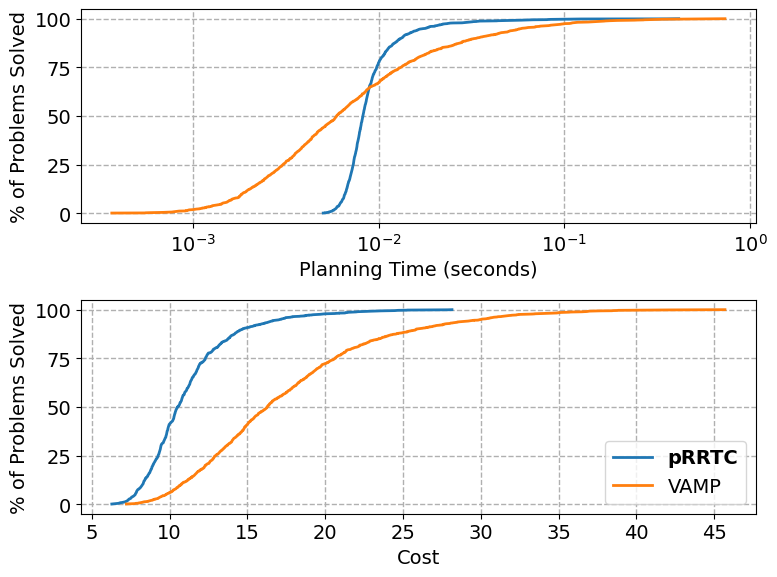

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# increase font size
plt.rcParams.update({'font.size': 14})

# ecdf plot for baxter

prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/baxter_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
vamp_data_path = "/home/pranav/gpu-planning/vamp/results_baxter_rrtc_r0.5_iters1e9.csv"


prrtc_data = pd.read_csv(prrtc_data_path)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)

vamp_data = pd.read_csv(vamp_data_path)
vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)

combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])

combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
combined_data["vamp_us"] = combined_data["planning_time"]


combined_data["prrtc_cost"] = combined_data["cost"]
combined_data["vamp_cost"] = combined_data["initial_path_cost"]




# Mapping of planners to their solved columns
solved_columns = {
    "prrtc_us": "prrtc_solved",
    "vamp_us": "vamp_solved",

}

# Mapping of solved column to planner name
planner_names = {
    "prrtc_solved": "pRRTC",
    "vamp_solved": "VAMP-RRTC",

}

fix, ax = plt.subplots(2, 1, figsize=(8, 6))
palette = plt.get_cmap("tab10")
num_problems = len(combined_data)  # Total number of problems

for i, (time_col, solved_col) in enumerate(solved_columns.items()):
    # Get planning times only for solved problems
    subset = combined_data[combined_data[solved_col] == True][time_col].dropna()
    
    if not subset.empty:
        # Sort times
        sorted_times = np.sort(subset) / 1e6 # convert to seconds
        
        # Compute percentage of total problems solved
        percentage_solved = (np.arange(1, len(sorted_times) + 1) / num_problems) * 100

        label = planner_names[solved_col]

        # Plot with filled area
        ax[0].plot(sorted_times, percentage_solved, label=label, color=palette(i), linewidth=2)
        # ax[0].fill_between(sorted_times, 0, percentage_solved, color=palette(i), alpha=0.2)

        # plot cost
        subset = combined_data[combined_data[solved_col] == True][f"{time_col[:-2]}cost"].dropna()
        sorted_costs = np.sort(subset)
        percentage_solved = (np.arange(1, len(sorted_costs) + 1) / num_problems) * 100
        ax[1].plot(sorted_costs, percentage_solved, label=label, color=palette(i), linewidth=2)
        # ax[1].fill_between(sorted_costs, 0, percentage_solved, color=palette(i), alpha=0.2)

ax[0].set_xscale("log")
ax[0].set_xlabel("Planning Time (seconds)")
ax[0].set_ylabel("% of Problems Solved")
# ax[0].set_title("Planning Time vs Solved Problems on Panda")
# ax[0].legend(title="", fontsize=12)
ax[0].grid(True, which="both", linestyle="--", linewidth=1.0)
# texts = ax[0].get_legend().get_texts()
# texts[0].set_fontweight('bold')
ax[0].xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[], numticks=5))  # Adjust number of major ticks
ax[0].xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=[], numticks=5))  # Adjust minor ticks

ax[1].set_xlabel("Cost")
ax[1].set_ylabel("% of Problems Solved")
# ax[1].set_title("Cost vs Solved Problems on Panda")
ax[1].legend(title="")
ax[1].grid(True, which="both", linestyle="--", linewidth=1.0)
texts = ax[1].get_legend().get_texts()
texts[0].set_fontweight('bold')

plt.tight_layout()

In [19]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/baxter_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
vamp_data_path = "/home/pranav/gpu-planning/vamp/results_baxter_rrtc_r0.5_iters1e9.csv"


prrtc_data = pd.read_csv(prrtc_data_path)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)

vamp_data = pd.read_csv(vamp_data_path)
vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)

combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])

combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
combined_data["vamp_us"] = combined_data["planning_time"]


combined_data["prrtc_cost"] = combined_data["cost"]
combined_data["vamp_cost"] = combined_data["initial_path_cost"]



In [20]:
vamp_data["planning_time"].mean() / 1e3

np.float64(16.529564931105046)

In [8]:
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Create tables
# Load Panda Data
panda_prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/panda_512_32_1.0_2_1.0_1_4.0_1.0_0.0001_main_2.csv"
panda_vamp_data_path = "/home/pranav/gpu-planning/vamp/results_panda_rrtc_r1.0_iters1e9.csv"
panda_gtmp_straight_data_path = '/home/pranav/gpu-planning/gtmp/panda_results_50_30_2_10_straight.pkl'
panda_gtmp_akima_data_path = '/home/pranav/gpu-planning/gtmp/panda_results_50_200_1_10_akima.pkl'
# panda_curobo_data_path = '/home/pranav/gpu-planning/curobo/curobo_3__custom_data.pkl'
panda_curobo_data_path = '/home/pranav/gpu-planning/curobo/curobo_maxattempts100_timeout120_custom_data.pkl'
panda_ompl_data_path = '/home/pranav/gpu-planning/ompl_benching1/vamp/ompl_panda_r1.0.csv'

# Load GTMP straight data
with open(panda_gtmp_straight_data_path, 'rb') as f:
    data = pickle.load(f)
panda_gtmp_straight_data = pd.DataFrame(data)

# Load GTMP akima data
with open(panda_gtmp_akima_data_path, 'rb') as f:
    data = pickle.load(f)
panda_gtmp_akima_data = pd.DataFrame(data)

with open(panda_curobo_data_path, 'rb') as f:
    data = pickle.load(f)
rows = []
for scene, problems in data.items():
    for index, problem in enumerate(problems):
        problem_data = problem.copy()
        problem_data['problem_name'] = scene.split('_panda')[0]
        problem_data['problem_idx'] = index + 1
        rows.append(problem_data)
panda_curobo_data = pd.DataFrame(rows)
panda_curobo_data.rename(columns={"success": "solved"}, inplace=True)

panda_ompl_data = pd.read_csv(panda_ompl_data_path)

panda_prrtc_data = pd.read_csv(panda_prrtc_data_path)
panda_prrtc_data["kernel_us"] = panda_prrtc_data["kernel_ns"] / 1000
panda_prrtc_data["wall_us"] = panda_prrtc_data["wall_ns"] / 1000
panda_prrtc_data["copy_us"] = panda_prrtc_data["copy_ns"] / 1000
panda_prrtc_data["kernel_copy_us"] = panda_prrtc_data["kernel_us"] + panda_prrtc_data["copy_us"]

panda_vamp_data = pd.read_csv(panda_vamp_data_path)

panda_prrtc_data["planner"] = "prrtc"
panda_vamp_data["planner"] = "vamp"
panda_curobo_data["planner"] = "curobo"
panda_ompl_data["planner"] = "ompl"
panda_gtmp_straight_data["planner"] = "gtmp_straight"
panda_gtmp_akima_data["planner"] = "gtmp_akima"

panda_prrtc_data["planning_ms"] = panda_prrtc_data["kernel_copy_us"]
panda_vamp_data["planning_ms"] = panda_vamp_data["planning_time"]
panda_curobo_data["planning_ms"] = panda_curobo_data["solve_time"] * 1e6
panda_ompl_data["planning_ms"] = panda_ompl_data["solution_nanoseconds"] / 1e3
panda_gtmp_straight_data["planning_ms"] = panda_gtmp_straight_data["time_us"]
panda_gtmp_akima_data["planning_ms"] = panda_gtmp_akima_data["time_us"]

panda_prrtc_data["cost"] = panda_prrtc_data["cost"]
panda_vamp_data["cost"] = panda_vamp_data["initial_path_cost"]
panda_curobo_data["cost"] = panda_curobo_data["cspace_path_length"]
panda_ompl_data["cost"] = panda_ompl_data["initial_cost"]
panda_gtmp_straight_data["cost"] = panda_gtmp_straight_data["avg_path_len"]
panda_gtmp_akima_data["cost"] = panda_gtmp_akima_data["avg_path_len"]

combined_panda_data = pd.concat([
    panda_prrtc_data,
    panda_vamp_data,
    panda_curobo_data,
    panda_ompl_data,
    panda_gtmp_straight_data,
    panda_gtmp_akima_data
], ignore_index=True)

# Load Fetch Data
fetch_prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
fetch_vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"

fetch_prrtc_data = pd.read_csv(fetch_prrtc_data_path)
fetch_prrtc_data["kernel_us"] = fetch_prrtc_data["kernel_ns"] / 1000
fetch_prrtc_data["wall_us"] = fetch_prrtc_data["wall_ns"] / 1000
fetch_prrtc_data["copy_us"] = fetch_prrtc_data["copy_ns"] / 1000
fetch_prrtc_data["planning_ms"] = fetch_prrtc_data["kernel_us"] + fetch_prrtc_data["copy_us"]
fetch_prrtc_data["planner"] = "prrtc"

fetch_vamp_data = pd.read_csv(fetch_vamp_data_path)
fetch_vamp_data["planning_ms"] = fetch_vamp_data["planning_time"]
fetch_vamp_data["planner"] = "vamp"
fetch_vamp_data["cost"] = fetch_vamp_data["initial_path_cost"]

combined_fetch_data = pd.concat([
    fetch_prrtc_data,
    fetch_vamp_data
], ignore_index=True)

# Load Baxter Data
baxter_prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/baxter_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
baxter_vamp_data_path = "/home/pranav/gpu-planning/vamp/results_baxter_rrtc_r0.5_iters1e9.csv"

prrtc_data = pd.read_csv(baxter_prrtc_data_path)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["planning_ms"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data["planner"] = "prrtc"

vamp_data = pd.read_csv(baxter_vamp_data_path)
vamp_data["planning_ms"] = vamp_data["planning_time"]
vamp_data["planner"] = "vamp"
vamp_data["cost"] = vamp_data["initial_path_cost"]


combined_baxter_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)

combined_panda_data["planning_ms"] = combined_panda_data["planning_ms"] / 1e3
combined_fetch_data["planning_ms"] = combined_fetch_data["planning_ms"] / 1e3
combined_baxter_data["planning_ms"] = combined_baxter_data["planning_ms"] / 1e3

planner_order = ["curobo", "ompl", "gtmp_straight", "gtmp_akima", "vamp", "prrtc"]

panda_time_table = pd.DataFrame()
panda_time_table["planner"] = combined_panda_data["planner"].groupby(combined_panda_data["planner"]).count().index
panda_time_table["mean_time"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["planning_ms"].mean().values
panda_time_table["Q1"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.25).values
panda_time_table["Median"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["planning_ms"].median().values
panda_time_table["Q3"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.75).values
panda_time_table["95%"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.95).values
panda_time_table["100%"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["planning_ms"].max().values
panda_time_table["Succ."] = combined_panda_data[~combined_panda_data["solved"].isna()].groupby("planner")["solved"].mean().values
# panda_time_table.sort_values("mean_time", ascending=True, inplace=True)
# panda_time_table["planner"] = pd.Categorical(panda_time_table["planner"], categories=planner_order, ordered=True)
# panda_time_table.sort_values("planner", inplace=True)

panda_cost_table = pd.DataFrame()
panda_cost_table["planner"] = combined_panda_data["planner"].groupby(combined_panda_data["planner"]).count().index
panda_cost_table["mean_cost"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["cost"].mean().values
panda_cost_table["Q1"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["cost"].quantile(0.25).values
panda_cost_table["Median"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["cost"].median().values
panda_cost_table["Q3"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["cost"].quantile(0.75).values
panda_cost_table["95%"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["cost"].quantile(0.95).values
panda_cost_table["Succ."] = combined_panda_data[~combined_panda_data["solved"].isna()].groupby("planner")["solved"].mean().values
panda_cost_table["100%"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["cost"].max().values
# panda_cost_table.sort_values("mean_cost", ascending=True, inplace=True)
# panda_cost_table["planner"] = pd.Categorical(panda_cost_table["planner"], categories=planner_order, ordered=True)
# panda_cost_table.sort_values("planner", inplace=True)

fetch_time_table = pd.DataFrame()
fetch_time_table["planner"] = combined_fetch_data["planner"].groupby(combined_fetch_data["planner"]).count().index
fetch_time_table["mean_time"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["planning_ms"].mean().values
fetch_time_table["Q1"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.25).values
fetch_time_table["Median"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["planning_ms"].median().values
fetch_time_table["Q3"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.75).values
fetch_time_table["95%"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.95).values
fetch_time_table["Succ."] = combined_fetch_data[~combined_fetch_data["solved"].isna()].groupby("planner")["solved"].mean().values
fetch_time_table["100%"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["planning_ms"].max().values
# fetch_time_table.sort_values("mean_time", ascending=True, inplace=True)
# fetch_time_table["planner"] = pd.Categorical(fetch_time_table["planner"], categories=planner_order, ordered=True)
# fetch_time_table.sort_values("planner", inplace=True)

fetch_cost_table = pd.DataFrame()
fetch_cost_table["planner"] = combined_fetch_data["planner"].groupby(combined_fetch_data["planner"]).count().index
fetch_cost_table["mean_cost"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["cost"].mean().values
fetch_cost_table["Q1"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["cost"].quantile(0.25).values
fetch_cost_table["Median"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["cost"].median().values
fetch_cost_table["Q3"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["cost"].quantile(0.75).values
fetch_cost_table["95%"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["cost"].quantile(0.95).values
fetch_cost_table["Succ."] = combined_fetch_data[~combined_fetch_data["solved"].isna()].groupby("planner")["solved"].mean().values
fetch_cost_table["100%"] = combined_fetch_data[combined_fetch_data["solved"] == True].groupby("planner")["cost"].max().values
# fetch_cost_table.sort_values("mean_cost", ascending=True, inplace=True)
# fetch_cost_table["planner"] = pd.Categorical(fetch_cost_table["planner"], categories=planner_order, ordered=True)
# fetch_cost_table.sort_values("planner", inplace=True)

baxter_time_table = pd.DataFrame()
baxter_time_table["planner"] = combined_baxter_data["planner"].groupby(combined_baxter_data["planner"]).count().index
baxter_time_table["mean_time"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["planning_ms"].mean().values
baxter_time_table["Q1"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.25).values
baxter_time_table["Median"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["planning_ms"].median().values
baxter_time_table["Q3"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.75).values
baxter_time_table["95%"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["planning_ms"].quantile(0.95).values
baxter_time_table["Succ."] = combined_baxter_data[~combined_baxter_data["solved"].isna()].groupby("planner")["solved"].mean().values
baxter_time_table["100%"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["planning_ms"].max().values
# baxter_time_table.sort_values("mean_time", ascending=True, inplace=True)
# baxter_time_table["planner"] = pd.Categorical(baxter_time_table["planner"], categories=planner_order, ordered=True)
# baxter_time_table.sort_values("planner", inplace=True)

baxter_cost_table = pd.DataFrame()
baxter_cost_table["planner"] = combined_baxter_data["planner"].groupby(combined_baxter_data["planner"]).count().index
baxter_cost_table["mean_cost"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["cost"].mean().values
baxter_cost_table["Q1"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["cost"].quantile(0.25).values
baxter_cost_table["Median"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["cost"].median().values
baxter_cost_table["Q3"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["cost"].quantile(0.75).values
baxter_cost_table["95%"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["cost"].quantile(0.95).values
baxter_cost_table["Succ."] = combined_baxter_data[~combined_baxter_data["solved"].isna()].groupby("planner")["solved"].mean().values
baxter_cost_table["100%"] = combined_baxter_data[combined_baxter_data["solved"] == True].groupby("planner")["cost"].max().values
# baxter_cost_table.sort_values("mean_cost", ascending=True, inplace=True)
# baxter_cost_table["planner"] = pd.Categorical(baxter_cost_table["planner"], categories=planner_order, ordered=True)
# baxter_cost_table.sort_values("planner", inplace=True)

readable_planner_names = {
    "prrtc": "pRRTC",
    "vamp": "VAMP",
    "curobo": "Curobo",
    "ompl": "OMPL",
    "gtmp_straight": "GTMP Straight",
    "gtmp_akima": "GTMP Akima",
}



def generate_latex_table(panda_time_df, fetch_time_df, baxter_time_df, panda_cost_df, fetch_cost_df, baxter_cost_df):
    planners = ["curobo", "ompl", "prrtc", "gtmp_akima", "gtmp_straight", "vamp"]
    table_header = r"""
\begin{table*}
\centering
\footnotesize
\begin{tabularx}{\textwidth}{l | l || X | X | X | X | X | X || X | X | X | X | X | X || X |}
    & & \multicolumn{5}{c}{Planning Time (ms)} & \multicolumn{5}{c}{Solution Cost (arclength)} & \\
    & System & Mean & Q1 & Med. & Q3 & 95\% & Max
    & Mean & Q1 & Med. & Q3 & 95\% & Max & Succ.\\
    \hline
    \hline
    """

    def format_table_section(time_df, cost_df, robot_name):
        num_planers = time_df["planner"].nunique()
        section = f"    \\parbox[t]{{0.3mm}}{{\\multirow{{{num_planers}}}{{*}}{{\\rotatebox[origin=c]{{90}}{{{robot_name}}}}}}}\n"
        if (robot_name == "Fetch") or (robot_name == "Baxter"):
            section.replace('6', '2')
        
        # Calculate minimum values
        min_time_mean = time_df["mean_time"].min()
        min_time_q1 = time_df["Q1"].min()
        min_time_median = time_df["Median"].min()
        min_time_q3 = time_df["Q3"].min()
        min_time_q95 = time_df["95%"].min()
        min_time_max = time_df["100%"].min()
        min_cost_mean = cost_df["mean_cost"].min()
        min_cost_q1 = cost_df["Q1"].min()
        min_cost_median = cost_df["Median"].min()
        min_cost_q3 = cost_df["Q3"].min()
        min_cost_q95 = cost_df["95%"].min()
        max_succ = time_df["Succ."].max() * 100


        for planner in planner_order:
            if planner not in time_df["planner"].values:
                continue
            time_row = time_df[time_df["planner"] == planner].iloc[0]
            cost_row = cost_df[cost_df["planner"] == planner].iloc[0]
            time_mean, time_q1, time_median, time_q3, time_q95, time_max, succ = time_row["mean_time"], time_row["Q1"], time_row["Median"], time_row["Q3"], time_row["95%"], time_row["100%"], time_row["Succ."] * 100
            cost_mean, cost_q1, cost_median, cost_q3, cost_q95, cost_max = cost_row["mean_cost"], cost_row["Q1"], cost_row["Median"], cost_row["Q3"], cost_row["95%"], cost_row["100%"]

            # Apply bold formatting to minimum values
            time_mean = f"\\textbf{{{time_mean:.2f}}}" if time_mean == min_time_mean else f"{time_mean:.2f}"
            time_q1 = f"\\textbf{{{time_q1:.2f}}}" if time_q1 == min_time_q1 else f"{time_q1:.2f}"
            time_median = f"\\textbf{{{time_median:.2f}}}" if time_median == min_time_median else f"{time_median:.2f}"
            time_q3 = f"\\textbf{{{time_q3:.2f}}}" if time_q3 == min_time_q3 else f"{time_q3:.2f}"
            time_q95 = f"\\textbf{{{time_q95:.2f}}}" if time_q95 == min_time_q95 else f"{time_q95:.2f}"
            time_max = f"\\textbf{{{time_max:.2f}}}" if time_max == min_time_max else f"{time_max:.2f}"
            cost_mean = f"\\textbf{{{cost_mean:.2f}}}" if cost_mean == min_cost_mean else f"{cost_mean:.2f}"
            cost_q1 = f"\\textbf{{{cost_q1:.2f}}}" if cost_q1 == min_cost_q1 else f"{cost_q1:.2f}"
            cost_median = f"\\textbf{{{cost_median:.2f}}}" if cost_median == min_cost_median else f"{cost_median:.2f}"
            cost_q3 = f"\\textbf{{{cost_q3:.2f}}}" if cost_q3 == min_cost_q3 else f"{cost_q3:.2f}"
            cost_q95 = f"\\textbf{{{cost_q95:.2f}}}" if cost_q95 == min_cost_q95 else f"{cost_q95:.2f}"
            succ = f"\\textbf{{{succ:.2f}\\%}}" if succ == max_succ else f"{succ:.2f}\\%"

            section += f"     & {readable_planner_names[planner].replace('_', '\\_')} & {time_mean} & {time_q1} & {time_median} & {time_q3} & {time_q95} & {time_max} & {cost_mean} & {cost_q1} & {cost_median} & {cost_q3} & {cost_q95} & {cost_max} & {succ} \\\\\n"
        
        section += "    \\hline\n"
        return section

    table_body = format_table_section(panda_time_df, panda_cost_df, "Panda")
    table_body += format_table_section(fetch_time_df, fetch_cost_df, "Fetch")
    table_body += format_table_section(baxter_time_df, baxter_cost_df, "Baxter")

    table_footer = r"""
  \end{tabularx}
  \caption{
    Results for all robots. Planning times shown in \textbf{milliseconds}, cost shown in units of configuration space.
  }
  \label{tbl:results}
 \vspace{-1em}
\end{table*}
"""

    return table_header + table_body + table_footer

# Generate LaTeX code
latex_code = generate_latex_table(panda_time_table, fetch_time_table, baxter_time_table, panda_cost_table, fetch_cost_table, baxter_cost_table)

# Print the LaTeX code so you can copy and paste it
print(latex_code)



\begin{table*}
\centering
\footnotesize
\begin{tabularx}{\textwidth}{l | l || X | X | X | X | X | X || X | X | X | X | X | X || X |}
    & & \multicolumn{5}{c}{Planning Time (ms)} & \multicolumn{5}{c}{Solution Cost (arclength)} & \\
    & System & Mean & Q1 & Med. & Q3 & 95\% & Max
    & Mean & Q1 & Med. & Q3 & 95\% & Max & Succ.\\
    \hline
    \hline
        \parbox[t]{0.3mm}{\multirow{6}{*}{\rotatebox[origin=c]{90}{Panda}}}
     & Curobo & 62.63 & 25.92 & 30.08 & 34.38 & 281.63 & 1537.75 & 7.52 & \textbf{5.45} & 6.89 & 8.96 & 14.09 & 24.522974014282227 & \textbf{100.00\%} \\
     & OMPL & 2.54 & 1.11 & 1.13 & 1.17 & 6.42 & 257.99 & 9.87 & 6.36 & 8.98 & 11.87 & 18.48 & 29.6436 & \textbf{100.00\%} \\
     & GTMP Straight & 0.35 & 0.30 & 0.32 & 0.37 & \textbf{0.51} & 1.21 & 10.29 & 9.12 & 9.92 & 11.15 & 13.32 & 16.837453842163086 & 89.41\% \\
     & GTMP Akima & 0.34 & 0.29 & 0.32 & 0.37 & 0.52 & \textbf{0.95} & 7.71 & 6.11 & 7.57 & 8.96 & 10.92 & 14.982744216918945 & 79.11\% \\
    

In [11]:
### Table with NA values for unsolved problems

import pickle
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Create tables
# Load Panda Data
panda_prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/panda_512_32_1.0_2_1.0_1_4.0_1.0_0.0001_main_2.csv"
panda_vamp_data_path = "/home/pranav/gpu-planning/vamp/results_panda_rrtc_r1.0_iters1e9.csv"
panda_gtmp_straight_data_path = '/home/pranav/gpu-planning/gtmp/panda_results_50_30_2_10_straight.pkl'
panda_gtmp_akima_data_path = '/home/pranav/gpu-planning/gtmp/panda_results_50_200_1_10_akima.pkl'
# panda_curobo_data_path = '/home/pranav/gpu-planning/curobo/curobo_3__custom_data.pkl'
panda_curobo_data_path = '/home/pranav/gpu-planning/curobo/curobo_maxattempts100_timeout120_custom_data.pkl'
panda_ompl_data_path = '/home/pranav/gpu-planning/ompl_benching1/vamp/ompl_panda_r1.0.csv'

# Load GTMP straight data
with open(panda_gtmp_straight_data_path, 'rb') as f:
    data = pickle.load(f)
panda_gtmp_straight_data = pd.DataFrame(data)

# Load GTMP akima data
with open(panda_gtmp_akima_data_path, 'rb') as f:
    data = pickle.load(f)
panda_gtmp_akima_data = pd.DataFrame(data)

with open(panda_curobo_data_path, 'rb') as f:
    data = pickle.load(f)
rows = []
for scene, problems in data.items():
    for index, problem in enumerate(problems):
        problem_data = problem.copy()
        problem_data['problem_name'] = scene.split('_panda')[0]
        problem_data['problem_idx'] = index + 1
        rows.append(problem_data)
panda_curobo_data = pd.DataFrame(rows)
panda_curobo_data.rename(columns={"success": "solved"}, inplace=True)

panda_ompl_data = pd.read_csv(panda_ompl_data_path)

panda_prrtc_data = pd.read_csv(panda_prrtc_data_path)
panda_prrtc_data["kernel_us"] = panda_prrtc_data["kernel_ns"] / 1000
panda_prrtc_data["wall_us"] = panda_prrtc_data["wall_ns"] / 1000
panda_prrtc_data["copy_us"] = panda_prrtc_data["copy_ns"] / 1000
panda_prrtc_data["kernel_copy_us"] = panda_prrtc_data["kernel_us"] + panda_prrtc_data["copy_us"]

panda_vamp_data = pd.read_csv(panda_vamp_data_path)

panda_prrtc_data["planner"] = "prrtc"
panda_vamp_data["planner"] = "vamp"
panda_curobo_data["planner"] = "curobo"
panda_ompl_data["planner"] = "ompl"
panda_gtmp_straight_data["planner"] = "gtmp_straight"
panda_gtmp_akima_data["planner"] = "gtmp_akima"

panda_prrtc_data["planning_us"] = panda_prrtc_data["kernel_copy_us"]
panda_vamp_data["planning_us"] = panda_vamp_data["planning_time"]
panda_curobo_data["planning_us"] = panda_curobo_data["solve_time"] * 1e6
panda_ompl_data["planning_us"] = panda_ompl_data["solution_nanoseconds"] / 1e3
panda_gtmp_straight_data["planning_us"] = panda_gtmp_straight_data["time_us"]
panda_gtmp_akima_data["planning_us"] = panda_gtmp_akima_data["time_us"]

panda_prrtc_data["cost"] = panda_prrtc_data["cost"]
panda_vamp_data["cost"] = panda_vamp_data["initial_path_cost"]
panda_curobo_data["cost"] = panda_curobo_data["cspace_path_length"]
panda_ompl_data["cost"] = panda_ompl_data["initial_cost"]
panda_gtmp_straight_data["cost"] = panda_gtmp_straight_data["avg_path_len"]
panda_gtmp_akima_data["cost"] = panda_gtmp_akima_data["avg_path_len"]

combined_panda_data = pd.concat([
    panda_prrtc_data,
    panda_vamp_data,
    panda_curobo_data,
    panda_ompl_data,
    panda_gtmp_straight_data,
    panda_gtmp_akima_data
], ignore_index=True)

# Load Fetch Data
fetch_prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
fetch_vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"

fetch_prrtc_data = pd.read_csv(fetch_prrtc_data_path)
fetch_prrtc_data["kernel_us"] = fetch_prrtc_data["kernel_ns"] / 1000
fetch_prrtc_data["wall_us"] = fetch_prrtc_data["wall_ns"] / 1000
fetch_prrtc_data["copy_us"] = fetch_prrtc_data["copy_ns"] / 1000
fetch_prrtc_data["planning_us"] = fetch_prrtc_data["kernel_us"] + fetch_prrtc_data["copy_us"]
fetch_prrtc_data["planner"] = "prrtc"

fetch_vamp_data = pd.read_csv(fetch_vamp_data_path)
fetch_vamp_data["planning_us"] = fetch_vamp_data["planning_time"]
fetch_vamp_data["planner"] = "vamp"
fetch_vamp_data["cost"] = fetch_vamp_data["initial_path_cost"]

combined_fetch_data = pd.concat([
    fetch_prrtc_data,
    fetch_vamp_data
], ignore_index=True)

# Load Baxter Data
baxter_prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/baxter_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
baxter_vamp_data_path = "/home/pranav/gpu-planning/vamp/results_baxter_rrtc_r0.5_iters1e9.csv"

prrtc_data = pd.read_csv(baxter_prrtc_data_path)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["planning_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data["planner"] = "prrtc"

vamp_data = pd.read_csv(baxter_vamp_data_path)
vamp_data["planning_us"] = vamp_data["planning_time"]
vamp_data["planner"] = "vamp"
vamp_data["cost"] = vamp_data["initial_path_cost"]


combined_baxter_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)

combined_panda_data["planning_ms"] = combined_panda_data["planning_us"] / 1e3
combined_panda_data.loc[(combined_panda_data["solved"] == False) | (combined_panda_data["valid"] == False), ["planning_ms", "cost"]] = np.inf

combined_fetch_data["planning_ms"] = combined_fetch_data["planning_us"] / 1e3
combined_baxter_data["planning_ms"] = combined_baxter_data["planning_us"] / 1e3

planner_order = ["curobo", "ompl", "gtmp_straight", "gtmp_akima", "vamp", "prrtc"]

panda_time_table = pd.DataFrame()
panda_time_table["planner"] = combined_panda_data["planner"].groupby(combined_panda_data["planner"]).count().index
panda_time_table["mean_time"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["planning_ms"].mean().values
panda_time_table["Q1"] = combined_panda_data.groupby("planner")["planning_ms"].quantile(0.25).values
panda_time_table["Median"] = combined_panda_data.groupby("planner")["planning_ms"].median().values
panda_time_table["Q3"] = combined_panda_data.groupby("planner")["planning_ms"].quantile(0.75).values
panda_time_table["95%"] = combined_panda_data.groupby("planner")["planning_ms"].quantile(0.95).values
panda_time_table["100%"] = combined_panda_data.groupby("planner")["planning_ms"].max().values
panda_time_table["Succ."] = combined_panda_data[~combined_panda_data["solved"].isna()].groupby("planner")["solved"].mean().values
# panda_time_table.sort_values("mean_time", ascending=True, inplace=True)
# panda_time_table["planner"] = pd.Categorical(panda_time_table["planner"], categories=planner_order, ordered=True)
# panda_time_table.sort_values("planner", inplace=True)

panda_cost_table = pd.DataFrame()
panda_cost_table["planner"] = combined_panda_data["planner"].groupby(combined_panda_data["planner"]).count().index
panda_cost_table["mean_cost"] = combined_panda_data[combined_panda_data["solved"] == True].groupby("planner")["cost"].mean().values
panda_cost_table["Q1"] = combined_panda_data.groupby("planner")["cost"].quantile(0.25).values
panda_cost_table["Median"] = combined_panda_data.groupby("planner")["cost"].median().values
panda_cost_table["Q3"] = combined_panda_data.groupby("planner")["cost"].quantile(0.75).values
panda_cost_table["95%"] = combined_panda_data.groupby("planner")["cost"].quantile(0.95).values
panda_cost_table["Succ."] = combined_panda_data[~combined_panda_data["solved"].isna()].groupby("planner")["solved"].mean().values
panda_cost_table["100%"] = combined_panda_data.groupby("planner")["cost"].max().values
# panda_cost_table.sort_values("mean_cost", ascending=True, inplace=True)
# panda_cost_table["planner"] = pd.Categorical(panda_cost_table["planner"], categories=planner_order, ordered=True)
# panda_cost_table.sort_values("planner", inplace=True)

fetch_time_table = pd.DataFrame()
fetch_time_table["planner"] = combined_fetch_data["planner"].groupby(combined_fetch_data["planner"]).count().index
fetch_time_table["mean_time"] = combined_fetch_data.groupby("planner")["planning_ms"].mean().values
fetch_time_table["Q1"] = combined_fetch_data.groupby("planner")["planning_ms"].quantile(0.25).values
fetch_time_table["Median"] = combined_fetch_data.groupby("planner")["planning_ms"].median().values
fetch_time_table["Q3"] = combined_fetch_data.groupby("planner")["planning_ms"].quantile(0.75).values
fetch_time_table["95%"] = combined_fetch_data.groupby("planner")["planning_ms"].quantile(0.95).values
fetch_time_table["Succ."] = combined_fetch_data[~combined_fetch_data["solved"].isna()].groupby("planner")["solved"].mean().values
fetch_time_table["100%"] = combined_fetch_data.groupby("planner")["planning_ms"].max().values
# fetch_time_table.sort_values("mean_time", ascending=True, inplace=True)
# fetch_time_table["planner"] = pd.Categorical(fetch_time_table["planner"], categories=planner_order, ordered=True)
# fetch_time_table.sort_values("planner", inplace=True)

fetch_cost_table = pd.DataFrame()
fetch_cost_table["planner"] = combined_fetch_data["planner"].groupby(combined_fetch_data["planner"]).count().index
fetch_cost_table["mean_cost"] = combined_fetch_data.groupby("planner")["cost"].mean().values
fetch_cost_table["Q1"] = combined_fetch_data.groupby("planner")["cost"].quantile(0.25).values
fetch_cost_table["Median"] = combined_fetch_data.groupby("planner")["cost"].median().values
fetch_cost_table["Q3"] = combined_fetch_data.groupby("planner")["cost"].quantile(0.75).values
fetch_cost_table["95%"] = combined_fetch_data.groupby("planner")["cost"].quantile(0.95).values
fetch_cost_table["Succ."] = combined_fetch_data[~combined_fetch_data["solved"].isna()].groupby("planner")["solved"].mean().values
fetch_cost_table["100%"] = combined_fetch_data.groupby("planner")["cost"].max().values
# fetch_cost_table.sort_values("mean_cost", ascending=True, inplace=True)
# fetch_cost_table["planner"] = pd.Categorical(fetch_cost_table["planner"], categories=planner_order, ordered=True)
# fetch_cost_table.sort_values("planner", inplace=True)

baxter_time_table = pd.DataFrame()
baxter_time_table["planner"] = combined_baxter_data["planner"].groupby(combined_baxter_data["planner"]).count().index
baxter_time_table["mean_time"] = combined_baxter_data.groupby("planner")["planning_ms"].mean().values
baxter_time_table["Q1"] = combined_baxter_data.groupby("planner")["planning_ms"].quantile(0.25).values
baxter_time_table["Median"] = combined_baxter_data.groupby("planner")["planning_ms"].median().values
baxter_time_table["Q3"] = combined_baxter_data.groupby("planner")["planning_ms"].quantile(0.75).values
baxter_time_table["95%"] = combined_baxter_data.groupby("planner")["planning_ms"].quantile(0.95).values
baxter_time_table["Succ."] = combined_baxter_data[~combined_baxter_data["solved"].isna()].groupby("planner")["solved"].mean().values
baxter_time_table["100%"] = combined_baxter_data.groupby("planner")["planning_ms"].max().values
# baxter_time_table.sort_values("mean_time", ascending=True, inplace=True)
# baxter_time_table["planner"] = pd.Categorical(baxter_time_table["planner"], categories=planner_order, ordered=True)
# baxter_time_table.sort_values("planner", inplace=True)

baxter_cost_table = pd.DataFrame()
baxter_cost_table["planner"] = combined_baxter_data["planner"].groupby(combined_baxter_data["planner"]).count().index
baxter_cost_table["mean_cost"] = combined_baxter_data.groupby("planner")["cost"].mean().values
baxter_cost_table["Q1"] = combined_baxter_data.groupby("planner")["cost"].quantile(0.25).values
baxter_cost_table["Median"] = combined_baxter_data.groupby("planner")["cost"].median().values
baxter_cost_table["Q3"] = combined_baxter_data.groupby("planner")["cost"].quantile(0.75).values
baxter_cost_table["95%"] = combined_baxter_data.groupby("planner")["cost"].quantile(0.95).values
baxter_cost_table["Succ."] = combined_baxter_data[~combined_baxter_data["solved"].isna()].groupby("planner")["solved"].mean().values
baxter_cost_table["100%"] = combined_baxter_data.groupby("planner")["cost"].max().values
# baxter_cost_table.sort_values("mean_cost", ascending=True, inplace=True)
# baxter_cost_table["planner"] = pd.Categorical(baxter_cost_table["planner"], categories=planner_order, ordered=True)
# baxter_cost_table.sort_values("planner", inplace=True)

readable_planner_names = {
    "prrtc": "pRRTC",
    "vamp": "VAMP-RRTC",
    "curobo": "Curobo",
    "ompl": "OMPL-RRTC",
    "gtmp_straight": "GTMP Straight",
    "gtmp_akima": "GTMP Akima",
}



def generate_latex_table(panda_time_df, fetch_time_df, baxter_time_df, panda_cost_df, fetch_cost_df, baxter_cost_df):
    planners = ["curobo", "ompl", "gtmp_akima", "gtmp_straight", "vamp", "prrtc"]
    table_header = r"""
\begin{table*}
\centering
\footnotesize
\begin{tabularx}{\textwidth}{l | l || X | X | X | X | X | X || X | X | X | X | X || X }
    & & \multicolumn{5}{c}{Planning Time (ms)} & \multicolumn{5}{c}{Solution Cost (arclength)} & \\
    & System & Mean & Q1 & Med. & Q3 & 95\% & 100\%
    & Mean & Q1 & Med. & Q3 & 95\% & Succ.\\
    \hline
    \hline
    """

    # Helper function for safe formatting
    def safe_format(x, bold_value=None, suffix=""):
        if pd.isna(x) or np.isinf(x):
            return "---"
        formatted = f"{x:.2f}{suffix}"
        if bold_value is not None and x == bold_value:
            formatted = f"\\textbf{{{formatted}}}"
        return formatted

    def format_table_section(time_df, cost_df, robot_name):
        num_planers = time_df["planner"].nunique()
        section = f"    \\parbox[t]{{0.3mm}}{{\\multirow{{{num_planers}}}{{*}}{{\\rotatebox[origin=c]{{90}}{{{robot_name}}}}}}}\n"
        if robot_name in ["Fetch", "Baxter"]:
            section = section.replace('6', '2')  # if this replacement is still desired
        
        # Calculate minimum (or maximum for success) values
        min_time_mean = time_df["mean_time"].min()
        min_time_q1 = time_df["Q1"].min()
        min_time_median = time_df["Median"].min()
        min_time_q3 = time_df["Q3"].min()
        min_time_q95 = time_df["95%"].min()
        min_time_q100 = time_df["100%"].min()
        min_cost_mean = cost_df["mean_cost"].min()
        min_cost_q1 = cost_df["Q1"].min()
        min_cost_median = cost_df["Median"].min()
        min_cost_q3 = cost_df["Q3"].min()
        min_cost_q95 = cost_df["95%"].min()
        max_succ = time_df["Succ."].max() * 100

        for planner in planners:
            if planner not in time_df["planner"].values:
                continue
            time_row = time_df[time_df["planner"] == planner].iloc[0]
            cost_row = cost_df[cost_df["planner"] == planner].iloc[0]
            
            # Extract raw values
            time_mean   = time_row["mean_time"]
            time_q1     = time_row["Q1"]
            time_median = time_row["Median"]
            time_q3     = time_row["Q3"]
            time_q95    = time_row["95%"]
            time_q100   = time_row["100%"]
            succ        = time_row["Succ."] * 100
            cost_mean   = cost_row["mean_cost"]
            cost_q1     = cost_row["Q1"]
            cost_median = cost_row["Median"]
            cost_q3     = cost_row["Q3"]
            cost_q95    = cost_row["95%"]

            # Format each value safely, applying bold formatting if the value equals the minimum (or maximum for success)
            time_mean_fmt   = safe_format(time_mean, bold_value=min_time_mean)
            time_q1_fmt     = safe_format(time_q1, bold_value=min_time_q1)
            time_median_fmt = safe_format(time_median, bold_value=min_time_median)
            time_q3_fmt     = safe_format(time_q3, bold_value=min_time_q3)
            time_q95_fmt    = safe_format(time_q95, bold_value=min_time_q95)
            time_q100_fmt   = safe_format(time_q100, bold_value=min_time_q100)
            cost_mean_fmt   = safe_format(cost_mean, bold_value=min_cost_mean)
            cost_q1_fmt     = safe_format(cost_q1, bold_value=min_cost_q1)
            cost_median_fmt = safe_format(cost_median, bold_value=min_cost_median)
            cost_q3_fmt     = safe_format(cost_q3, bold_value=min_cost_q3)
            cost_q95_fmt    = safe_format(cost_q95, bold_value=min_cost_q95)
            succ_fmt        = safe_format(succ, bold_value=max_succ, suffix="\\%")

            section += (
                f"     & {readable_planner_names[planner].replace('_', '\\_')} & "
                f"{time_mean_fmt} & {time_q1_fmt} & {time_median_fmt} & {time_q3_fmt} & {time_q95_fmt} & {time_q100_fmt} & "
                f"{cost_mean_fmt} & {cost_q1_fmt} & {cost_median_fmt} & {cost_q3_fmt} & {cost_q95_fmt} & {succ_fmt} \\\\\n"
            )
        
        section += "    \\hline\n"
        return section

    table_body = (
        format_table_section(panda_time_df, panda_cost_df, "Panda") +
        format_table_section(fetch_time_df, fetch_cost_df, "Fetch") +
        format_table_section(baxter_time_df, baxter_cost_df, "Baxter")
    )

    table_footer = r"""
  \end{tabularx}
  \caption{
    Results for all robots. Planning times shown in \textbf{milliseconds}, cost shown in units of configuration space.
  }
  \label{tbl:results}
 \vspace{-1em}
\end{table*}
"""

    return table_header + table_body + table_footer


# Generate LaTeX code
latex_code = generate_latex_table(panda_time_table, fetch_time_table, baxter_time_table, panda_cost_table, fetch_cost_table, baxter_cost_table)

# Print the LaTeX code so you can copy and paste it
print(latex_code)



\begin{table*}
\centering
\footnotesize
\begin{tabularx}{\textwidth}{l | l || X | X | X | X | X | X || X | X | X | X | X || X }
    & & \multicolumn{5}{c}{Planning Time (ms)} & \multicolumn{5}{c}{Solution Cost (arclength)} & \\
    & System & Mean & Q1 & Med. & Q3 & 95\% & 100\%
    & Mean & Q1 & Med. & Q3 & 95\% & Succ.\\
    \hline
    \hline
        \parbox[t]{0.3mm}{\multirow{6}{*}{\rotatebox[origin=c]{90}{Panda}}}
     & Curobo & 62.63 & 25.92 & 30.08 & 34.38 & 281.63 & 1537.75 & 7.52 & \textbf{5.45} & 6.89 & 8.96 & 14.09 & \textbf{100.00\%} \\
     & OMPL-RRTC & 2.54 & 1.11 & 1.13 & 1.17 & 6.42 & 257.99 & 9.87 & 6.36 & 8.98 & 11.87 & 18.48 & \textbf{100.00\%} \\
     & GTMP Akima & 0.34 & 0.29 & 0.34 & 0.52 & --- & --- & 7.71 & 6.41 & 8.35 & 10.90 & --- & 79.11\% \\
     & GTMP Straight & 0.35 & 0.30 & 0.33 & 0.43 & --- & --- & 10.29 & 9.22 & 10.07 & 12.12 & --- & 89.41\% \\
     & VAMP-RRTC & \textbf{0.23} & \textbf{0.04} & \textbf{0.08} & \textbf{0.18} & 1.16 & 3.80 & 7.98 & 5

In [15]:
fetch_prrtc_data.sort_values("kernel_us", ascending=False).head(10)

,problem_name,problem_idx,solved,vamp_valid,cost,path_length,start_tree_size,goal_tree_size,iters,wall_ns,...,tree_ratio,dynamic_domain,dd_alpha,dd_radius,dd_min_radius,kernel_us,wall_us,copy_us,planning_us,planner
454,cage,70,1,1,24.1778,49,9634,4719,465,68256843,...,1,1,0.0001,4,1,51346.154,68256.843,40.847,51387.001,prrtc
30,bookshelf_small,32,1,1,24.8096,50,2157,1123,903,66434496,...,1,1,0.0001,4,1,49564.004,66434.496,40.828,49604.832,prrtc
428,cage,44,1,1,23.8100,48,9427,4699,432,63290137,...,1,1,0.0001,4,1,46198.948,63290.137,41.609,46240.557,prrtc
155,bookshelf_tall,60,1,1,20.9909,42,1776,858,558,58909626,...,1,1,0.0001,4,1,41440.666,58909.626,41.258,41481.924,prrtc
396,cage,12,1,1,20.8973,42,8265,4091,341,53028717,...,1,1,0.0001,4,1,36230.591,53028.717,40.366,36270.957,prrtc
52,bookshelf_small,55,1,1,28.5904,58,1573,927,724,51821531,...,1,1,0.0001,4,1,35370.569,51821.531,39.143,35409.712,prrtc
134,bookshelf_tall,38,1,1,29.4442,60,2131,1042,427,50376726,...,1,1,0.0001,4,1,33428.727,50376.726,42.220,33470.947,prrtc
469,cage,85,1,1,26.5832,54,8349,4055,308,48753906,...,1,1,0.0001,4,1,31744.381,48753.906,40.055,31784.436,prrtc
4,bookshelf_small,5,1,1,22.2474,45,3101,1520,446,47187352,...,1,1,0.0001,4,1,30441.675,47187.352,40.536,30482.211,prrtc
445,cage,61,1,1,22.3305,45,7659,3844,274,45560263,...,1,1,0.0001,4,1,28688.548,45560.263,41.198,28729.746,prrtc


In [35]:
# get Q1
l = panda_prrtc_data["planning_us"].sort_values().shape[0]
print(panda_prrtc_data["planning_us"].sort_values()[int(l/4)], panda_prrtc_data["planning_us"].quantile(0.25))

605.301 700.5215000000001


In [89]:
panda_gtmp_straight_data["planning_us"].quantile(0.75)

np.float64(427.9613494873047)

In [77]:
panda_gtmp_straight_data.loc[(panda_gtmp_straight_data["solved"] == False) | (panda_gtmp_straight_data["valid"] == False), "planning_us"] = 1e9

In [70]:
panda_gtmp_straight_data[panda_gtmp_straight_data["solved"] == False]["planning_us"]

145    1.000000e+09
400    1.000000e+09
401    1.000000e+09
402    1.000000e+09
403    1.000000e+09
           ...     
492    1.000000e+09
493    1.000000e+09
494    1.000000e+09
496    1.000000e+09
497    1.000000e+09
Name: planning_us, Length: 74, dtype: float64

In [79]:
panda_gtmp_straight_data["planning_us"].isna().sum()

np.int64(1)

In [82]:
panda_gtmp_straight_data.iloc[540, :]

time_us                       NaN
cf_percent                    NaN
avg_path_len                  NaN
path_diversities              NaN
min_cosin                     NaN
mean_cosin                    NaN
problem_name                  NaN
problem_idx                   NaN
planner             gtmp_straight
num_plans                     NaN
num_dreams                    NaN
num_layers                    NaN
num_probes                    NaN
seed                          NaN
solved                        NaN
valid                         NaN
robot                         NaN
planning_us                   NaN
cost                          NaN
Name: 540, dtype: object

In [13]:
combined_panda_data["robot"] = "panda"
combined_fetch_data["robot"] = "fetch"
combined_baxter_data["robot"] = "baxter"
combined_baxter_data["problem_name"] = "bookshelf_combined"
all_combined_data = pd.concat([
    combined_panda_data,
    combined_fetch_data,
    combined_baxter_data
], ignore_index=True)
all_combined_data.to_csv("combined_table1_data.csv", index=False)

In [ ]:
a = all_combined_data[all_combined_data["solved"] == True].groupby("planner")["planning_ms"].mean()
b = all_combined_data[all_combined_data["solved"] == True & all_combined_data["robot"].isin(["fetch", "baxter"])].groupby("planner")["planning_ms"].mean()
c = all_combined_data[all_combined_data["solved"] == True].groupby("planner")["cost"].mean()
d = all_combined_data[all_combined_data["solved"] == True & all_combined_data["robot"].isin(["fetch", "baxter"])].groupby("planner")["cost"].mean()
print(a["vamp"] / a["prrtc"])
print(b["vamp"] / b["prrtc"])
print(c["vamp"] / c["prrtc"])
print(d["vamp"] / d["prrtc"])

e = all_combined_data[all_combined_data["solved"] == True].groupby("planner")["planning_ms"].var()
print(e["vamp"] / e["prrtc"])

f = all_combined_data[all_combined_data["solved"] == True & all_combined_data["robot"].isin(["fetch", "baxter"])].groupby("planner")["planning_ms"].mean()



1.7597228905501876
1.8038968592759963
1.4879551529117072
1.5472784617091688
5.050244569695485


In [34]:
t = cost_data.loc[["baxter", "fetch"]].groupby("planner")["std"].mean()
t["vamp"] / t["prrtc"]

np.float64(1.5720840322002956)

In [25]:
10.202606/5.257740

1.9404926831680531

In [26]:
c = cost_data.groupby("planner")["mean"].mean()
c["vamp"] / c["prrtc"]

np.float64(1.4611393952404885)

In [17]:
time_data

count       mean         std       min        25%  \
robot  planner                                                             
baxter prrtc          1470.0  10.754172   20.512062  5.041568   7.321050   
       vamp           1466.0  16.529565   41.604653  0.367252   3.066330   
fetch  prrtc           679.0   4.231178    5.647121  1.170326   1.799694   
       vamp            679.0  13.850687   34.921357  0.032892   0.692551   
panda  curobo          699.0  62.629709  129.956898  4.951000  25.916696   
       gtmp_akima      553.0   0.344968    0.085080  0.246525   0.287771   
       gtmp_straight   625.0   0.349560    0.090271  0.248909   0.295877   
       ompl            699.0   2.540898   10.508507  0.089048   1.113230   
       prrtc           699.0   0.787869    0.135414  0.525180   0.700522   
       vamp            699.0   0.227565    0.450309  0.009258   0.040526   

                            50%        75%          max  
robot  planner                                           
baxter prrtc           8.248674   9.795053   511.136175  
       vamp            5.962715  13.194626   731.491519  
fetch  prrtc           2.459077   4.203233    51.387001  
       vamp            2.398773  11.236328   392.910180  
panda  curobo         30.076981  34.382701  1537.747383  
       gtmp_akima      0.318289   0.368357     0.945807  
       gtmp_straight   0.317335   0.366926     1.212120  
       ompl            1.129180   1.174796   257.990645  
       prrtc           0.759001   0.866870     2.011835  
       vamp            0.076374   0.178778     3.802799

In [14]:
time_data = all_combined_data[all_combined_data["solved"] == True].groupby(["robot", "planner"])["planning_ms"].describe()
cost_data = all_combined_data[all_combined_data["solved"] == True].groupby(["robot", "planner"])["cost"].describe()
for robot_name in ["panda", "fetch", "baxter"]:
    time_df = time_data.loc[robot_name]
    cost_df = cost_data.loc[robot_name]
    for planner_a in ["prrtc"]:
        for planner_b in ["vamp"]: #"curobo", "ompl", "gtmp_straight", "gtmp_akima"]:
            if planner_b not in time_df.index:
                continue
            a_time_mean = time_df.loc[planner_a]["mean"]
            b_time_mean = time_df.loc[planner_b]["mean"]
            a_time_std = time_df.loc[planner_a]["std"]
            b_time_std = time_df.loc[planner_b]["std"]
            a_time_var = time_df.loc[planner_a]["std"] ** 2
            b_time_var = time_df.loc[planner_b]["std"] ** 2
            a_cost_mean = cost_df.loc[planner_a]["mean"]
            b_cost_mean = cost_df.loc[planner_b]["mean"]
            a_cost_std = cost_df.loc[planner_a]["std"]
            b_cost_std = cost_df.loc[planner_b]["std"]
            a_cost_var = cost_df.loc[planner_a]["std"] ** 2
            b_cost_var = cost_df.loc[planner_b]["std"] ** 2
            time_mean_speedup = (b_time_mean - a_time_mean) / b_time_mean * 100
            time_mean_x = b_time_mean / a_time_mean
            time_var_speedup = (b_time_var - a_time_var) / b_time_var * 100
            time_var_x = b_time_var / a_time_var
            cost_mean_speedup = (b_cost_mean - a_cost_mean) / b_cost_mean * 100
            cost_mean_x = b_cost_mean / a_cost_mean
            cost_var_speedup = (b_cost_var - a_cost_var) / b_cost_var * 100
            cost_var_x = b_cost_var / a_cost_var
            print(f"{robot_name} {planner_a} vs {planner_b}:")
            print(f"  Time Mean Speedup: {time_mean_speedup:.2f}%")
            print(f"  Time Mean x: {time_mean_x:.2f}")
            print(f"  Time Var Speedup: {time_var_speedup:.2f}%")
            print(f"  Time Var x: {time_var_x:.2f}")
            print(f"  Cost Mean Speedup: {cost_mean_speedup:.2f}%")
            print(f"  Cost Mean x: {cost_mean_x:.2f}")
            print(f"  Cost Var Speedup: {cost_var_speedup:.2f}%")
            print(f"  Cost Var x: {cost_var_x:.2f}")
            print()

panda prrtc vs vamp:
  Time Mean Speedup: -246.22%
  Time Mean x: 0.29
  Time Var Speedup: 90.96%
  Time Var x: 11.06
  Cost Mean Speedup: 14.35%
  Cost Mean x: 1.17
  Cost Var Speedup: 85.23%
  Cost Var x: 6.77

fetch prrtc vs vamp:
  Time Mean Speedup: 69.45%
  Time Mean x: 3.27
  Time Var Speedup: 97.38%
  Time Var x: 38.24
  Cost Mean Speedup: 34.47%
  Cost Mean x: 1.53
  Cost Var Speedup: 41.69%
  Cost Var x: 1.72

baxter prrtc vs vamp:
  Time Mean Speedup: 34.94%
  Time Mean x: 1.54
  Time Var Speedup: 75.69%
  Time Var x: 4.11
  Cost Mean Speedup: 35.86%
  Cost Mean x: 1.56
  Cost Var Speedup: 75.68%
  Cost Var x: 4.11



In [54]:
a.loc["panda"].loc["prrtc"]

count    699.000000
mean       0.787869
std        0.135414
min        0.525180
25%        0.700522
50%        0.759001
75%        0.866870
max        2.011835
Name: prrtc, dtype: float64

In [28]:
def percent_decrease(old, new):
    return (old - new) / old * 100

def x_increase(old, new):
    return (new - old) / old * 100

percent_decrease(16.529565, 10.754172)


34.939776092111316

In [29]:
16.529565/10.754172

1.5370374399814324

In [30]:
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"

# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)


# combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])
# combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
# combined_data["vamp_us"] = combined_data["planning_time"]
# combined_data["prrtc_cost"] = combined_data["cost"]
# combined_data["vamp_cost"] = combined_data["initial_path_cost"]

# pallete = "tab10"

# # Reshape data
# melted_time_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_us", "vamp_us"], var_name="Time Type", value_name="Time (microseconds)")
# melted_cost_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_cost", "vamp_cost"], var_name="Cost Type", value_name="Cost")
# # Box plot of planning time and cost

# fig, ax = plt.subplots(2, 1, figsize=(12, 12))
# sns.boxplot(x="problem_name", y="Time (microseconds)", hue="Time Type", data=melted_time_data, ax=ax[0], palette=pallete, width=0.5)
# sns.boxplot(x="problem_name", y="Cost", hue="Cost Type", data=melted_cost_data, ax=ax[1], palette=pallete, width=0.5)
# ax[0].set_title("Fetch Planning Time\n0.5 range, 32 resolution")
# ax[0].set_ylabel("Time (microseconds)")
# ax[0].set_xlabel("")
# ax[0].legend(title="Planning Method")
# ax[0].set_yscale("log")
# ax[0].yaxis.grid(True)


# ax[1].set_title("Cost")
# ax[1].set_xlabel("")
# ax[1].set_ylabel("Cost")
# ax[1].legend(title="Planning Method")
# ax[1].yaxis.grid(True)
# plt.tight_layout()

# print(prrtc_data[prrtc_data["prrtc_solved"] == False].shape, vamp_data[vamp_data["vamp_solved"] == False].shape)

In [31]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# # plt.rcParams['lines.linewidth'] = 3 
# font_size = 24

# plt.rcParams.update(
#     {
#         'font.size': font_size,
#         'lines.linewidth': 2.5,
#     }
# )

# # Data loading and processing (unchanged)
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"

# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["planning_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data["planning_s"] = prrtc_data["planning_us"] / 1e6
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)
# prrtc_data["planner"] = "pRRTC"

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)
# vamp_data["planning_us"] = vamp_data["planning_time"]
# vamp_data["planning_s"] = vamp_data["planning_us"] / 1e6
# vamp_data["planner"] = "VAMP"
# vamp_data["cost"] = vamp_data["initial_path_cost"]

# combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)
# combined_data["log_planning_us"] = np.log10(combined_data["planning_us"])

# # Create a figure with shared x-axis but with extra space at the top for problem names
# fig = plt.figure(figsize=(16, 14))

# # Create a more compact gridspec - reduced height for top row
# gs = fig.add_gridspec(3, 1, height_ratios=[0.02, 1, 1])  

# # Create the three axes
# ax_top = fig.add_subplot(gs[0])  # This will be for the problem names
# ax1 = fig.add_subplot(gs[1])     # Planning Time plot
# ax2 = fig.add_subplot(gs[2], sharex=ax1)  # Planning Cost plot

# x_axis_order = ["table_pick", "table_under_pick", "box", "bookshelf_thin", "bookshelf_small", "bookshelf_tall", "cage"]
# x_axis_readable = ["Table\nPick", "Table\nUnder Pick", "Box", "Bookshelf\nThin", "Bookshelf\nSmall", "Bookshelf\nTall", "Cage"]
# hue_order = ["pRRTC", "VAMP"]

# # Top plot - Planning Time
# flierprops = dict(marker='o', markersize=8, markeredgewidth=2.5)
# g1 = sns.boxplot(x="problem_name", y="planning_s", hue="planner", hue_order=hue_order, 
#                 data=combined_data, ax=ax1, palette="tab10", log_scale=True, 
#                 width=0.5, order=x_axis_order, linewidth=2.5, flierprops=flierprops)
# ax1.set_ylabel("Planning Time (seconds)", fontsize=font_size, labelpad=10)
# ax1.tick_params(axis='y', labelsize=font_size)
# ax1.set_xlabel("")
# ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Hide x-labels
# ax1.yaxis.grid(True, linewidth=2.0, linestyle="--")
# for line in ax1.get_lines():
#     line.set_linewidth(2.5)

# # Get legend from the first plot
# handles, labels = ax1.get_legend_handles_labels()
# leg = ax1.legend(title="", fontsize=24)
# for text in leg.get_texts():
#     text.set_fontweight('bold')
#     break

# # Bottom plot - Planning Cost
# g2 = sns.boxplot(x="problem_name", y="cost", hue="planner", hue_order=hue_order, 
#                 data=combined_data, ax=ax2, palette="tab10", log_scale=False, 
#                 width=0.5, order=x_axis_order, linewidth=2.5, flierprops=flierprops)
# ax2.set_ylabel("Cost", fontsize=font_size, labelpad=35)
# ax2.tick_params(axis='y', labelsize=font_size)
# ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Hide x-labels
# ax2.yaxis.grid(True, linewidth=2.0, linestyle="--")
# ax2.set_xlabel("")

# # Remove the legend from the second plot
# ax2.get_legend().remove()
# ax2.spines['top'].set_visible(False)  # Hide top spine
# # for ax in [ax1, ax2]:
# #     for spine in ax.spines.values():
# #         spine.set_linewidth(2.5)  # Increase border thickness

# # Set up the top axis for problem names
# ax_top.set_xlim(ax1.get_xlim())  # Match x limits to main plot
# ax_top.spines['left'].set_visible(False)  # Hide all spines
# ax_top.spines['right'].set_visible(False)
# ax_top.spines['top'].set_visible(False)
# ax_top.spines['bottom'].set_visible(False)
# ax_top.tick_params(axis='y', which='both', left=False, labelleft=False)  # Hide y-axis ticks

# # Set x ticks and labels for the top axis
# ax_top.set_xticks(range(len(x_axis_order)))
# ax_top.set_xticklabels(x_axis_readable, fontsize=24)
# ax_top.xaxis.tick_top()  # Move ticks to top
# ax_top.xaxis.set_ticks_position('none')  # Hide x-axis ticks
# ax_top.set_frame_on(False)

# # Adjust spacing between subplots
# plt.tight_layout()
# # Reduce the space between the plots, especially between top and first plot
# plt.subplots_adjust(hspace=0.01, top=0.98)

# # Optional: position adjustment for top labels (if needed)
# # This manually shifts the labels down slightly
# fig.canvas.draw()  # Draw the canvas to compute text positions
# for label in ax_top.get_xticklabels():
#     label.set_y(0.2)  # Adjust this value to move labels down (0.5 is middle, 0 is bottom)



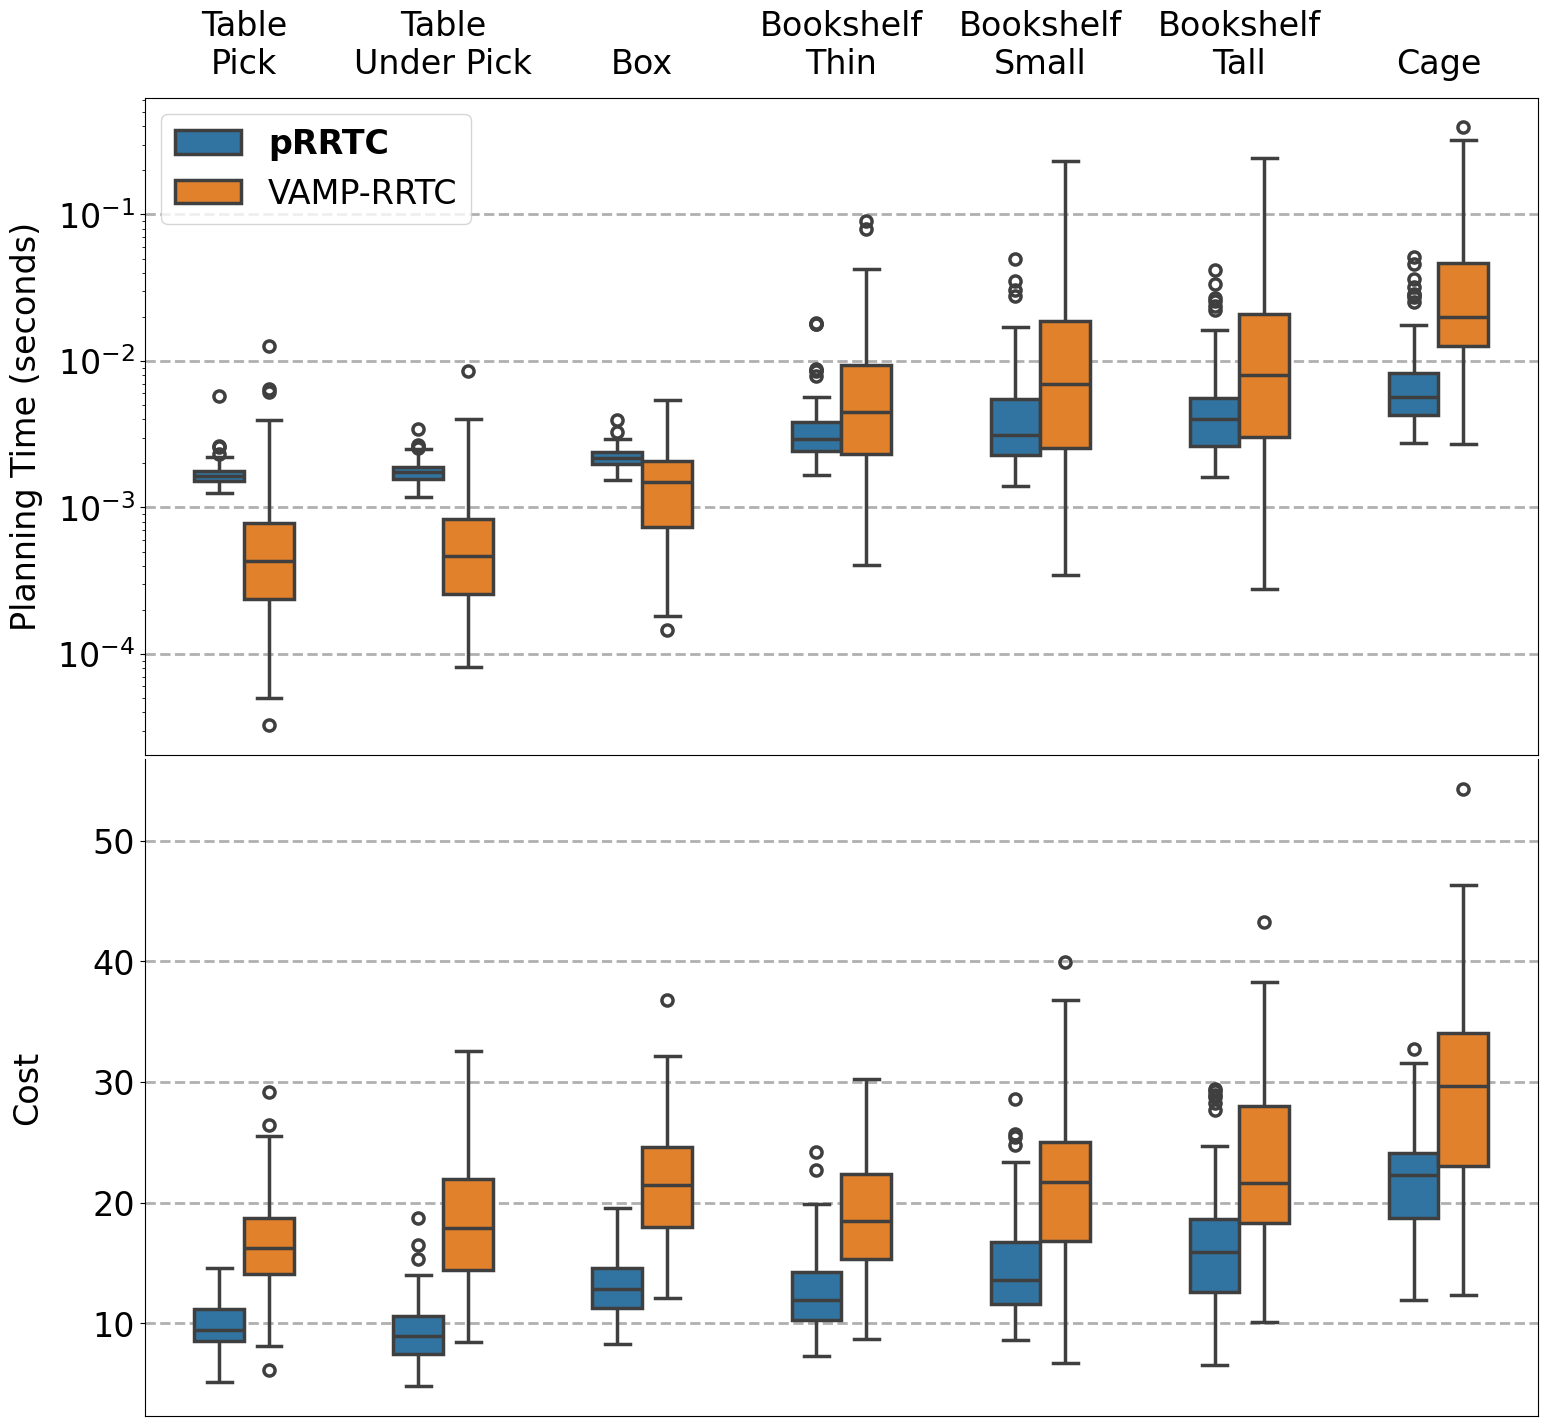

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# plt.rcParams['lines.linewidth'] = 3 
font_size = 24

plt.rcParams.update(
    {
        'font.size': font_size,
        'lines.linewidth': 2.5,
    }
)

# Data loading and processing (unchanged)
prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"

prrtc_data = pd.read_csv(prrtc_data_path)
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["planning_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data["planning_s"] = prrtc_data["planning_us"] / 1e6
prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)
prrtc_data["planner"] = "pRRTC"

vamp_data = pd.read_csv(vamp_data_path)
vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)
vamp_data["planning_us"] = vamp_data["planning_time"]
vamp_data["planning_s"] = vamp_data["planning_us"] / 1e6
vamp_data["planner"] = "VAMP-RRTC"
vamp_data["cost"] = vamp_data["initial_path_cost"]

combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)
combined_data["log_planning_us"] = np.log10(combined_data["planning_us"])

# Create a figure with shared x-axis but with extra space at the top for problem names
fig = plt.figure(figsize=(16, 14))

# Create a more compact gridspec - reduced height for top row
gs = fig.add_gridspec(3, 1, height_ratios=[0.02, 1, 1])  

# Create the three axes
ax_top = fig.add_subplot(gs[0])  # This will be for the problem names
ax1 = fig.add_subplot(gs[1])     # Planning Time plot
ax2 = fig.add_subplot(gs[2], sharex=ax1)  # Planning Cost plot

x_axis_order = ["table_pick", "table_under_pick", "box", "bookshelf_thin", "bookshelf_small", "bookshelf_tall", "cage"]
x_axis_readable = ["Table\nPick", "Table\nUnder Pick", "Box", "Bookshelf\nThin", "Bookshelf\nSmall", "Bookshelf\nTall", "Cage"]
hue_order = ["pRRTC", "VAMP-RRTC"]

# Top plot - Planning Time
flierprops = dict(marker='o', markersize=8, markeredgewidth=2.5)
g1 = sns.boxplot(x="problem_name", y="planning_s", hue="planner", hue_order=hue_order, 
                data=combined_data, ax=ax1, palette="tab10", log_scale=True, 
                width=0.5, order=x_axis_order, linewidth=2.5, flierprops=flierprops)
ax1.set_ylabel("Planning Time (seconds)", labelpad=10)
ax1.tick_params(axis='y')
ax1.set_xlabel("")
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Hide x-labels
ax1.yaxis.grid(True, linewidth=2.0, linestyle="--")
for line in ax1.get_lines():
    line.set_linewidth(2.5)

# Get legend from the first plot
handles, labels = ax1.get_legend_handles_labels()
leg = ax1.legend(title="")
for text in leg.get_texts():
    text.set_fontweight('bold')
    break

# Bottom plot - Planning Cost
g2 = sns.boxplot(x="problem_name", y="cost", hue="planner", hue_order=hue_order, 
                data=combined_data, ax=ax2, palette="tab10", log_scale=False, 
                width=0.5, order=x_axis_order, linewidth=2.5, flierprops=flierprops)
ax2.set_ylabel("Cost", labelpad=35)
ax2.tick_params(axis='y')
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Hide x-labels
ax2.yaxis.grid(True, linewidth=2.0, linestyle="--")
ax2.set_xlabel("")

# Remove the legend from the second plot
ax2.get_legend().remove()
ax2.spines['top'].set_visible(False)  # Hide top spine
# for ax in [ax1, ax2]:
#     for spine in ax.spines.values():
#         spine.set_linewidth(2.5)  # Increase border thickness

# Set up the top axis for problem names
ax_top.set_xlim(ax1.get_xlim())  # Match x limits to main plot
ax_top.spines['left'].set_visible(False)  # Hide all spines
ax_top.spines['right'].set_visible(False)
ax_top.spines['top'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)
ax_top.tick_params(axis='y', which='both', left=False, labelleft=False)  # Hide y-axis ticks

# Set x ticks and labels for the top axis
ax_top.set_xticks(range(len(x_axis_order)))
ax_top.set_xticklabels(x_axis_readable)
ax_top.xaxis.tick_top()  # Move ticks to top
ax_top.xaxis.set_ticks_position('none')  # Hide x-axis ticks
ax_top.set_frame_on(False)

# Adjust spacing between subplots
plt.tight_layout()
# Reduce the space between the plots, especially between top and first plot
plt.subplots_adjust(hspace=0.01, top=0.98)

# Optional: position adjustment for top labels (if needed)
# This manually shifts the labels down slightly
fig.canvas.draw()  # Draw the canvas to compute text positions
for label in ax_top.get_xticklabels():
    label.set_y(0.2)  # Adjust this value to move labels down (0.5 is middle, 0 is bottom)



In [33]:
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"

# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)

# combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])
# combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
# combined_data["vamp_us"] = combined_data["planning_time"]
# combined_data["prrtc_cost"] = combined_data["cost"]
# combined_data["vamp_cost"] = combined_data["initial_path_cost"]

# # Mapping of planners to their solved columns
# solved_columns = {
#     "prrtc_us": "prrtc_solved",
#     "vamp_us": "vamp_solved",
# }

# plt.figure(figsize=(12, 6))
# palette = plt.get_cmap("tab10")
# num_problems = len(combined_data)  # Total number of problems

# for i, (time_col, solved_col) in enumerate(solved_columns.items()):
#     # Get planning times only for solved problems
#     subset = combined_data[combined_data[solved_col] == True][time_col].dropna()
    
#     if not subset.empty:
#         # Sort times
#         sorted_times = np.sort(subset)
        
#         # Compute percentage of total problems solved
#         percentage_solved = (np.arange(1, len(sorted_times) + 1) / num_problems) * 100

#         # Plot with filled area
#         plt.plot(sorted_times, percentage_solved, label=time_col, color=palette(i))
#         plt.fill_between(sorted_times, 0, percentage_solved, color=palette(i), alpha=0.2)

# plt.xscale("log")
# plt.xlabel("Planning Time (microseconds)")
# plt.ylabel("Percentage of Problems Solved")
# plt.title("Planning Time vs Solved Problems on Fetch")
# plt.legend(title="Planning Method")
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# plt.show()


In [34]:
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"


# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["planning_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)
# prrtc_data["planner"] = "pRRTC"

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)
# vamp_data["planning_us"] = vamp_data["planning_time"]
# vamp_data["planner"] = "VAMP"
# vamp_data["cost"] = vamp_data["initial_path_cost"]


# combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)
# combined_data["log_planning_us"] = np.log10(combined_data["planning_us"])


# fig, ax = plt.subplots(2, 2, figsize=(16, 16))
# g = sns.kdeplot(x="log_planning_us", y="cost", data=combined_data, hue="planner", hue_order=["VAMP", "pRRTC"], bw_adjust=0.5, fill=True, palette="tab10", ax=ax[0, 0])
# g.set_title("Fetch: 0.5 range, 32 resolution")
# g = sns.scatterplot(x="log_planning_us", y="cost", data=combined_data, hue="planner", palette="tab10", hue_order=["VAMP", "pRRTC"], ax=ax[1 ,0])
# g = sns.boxplot(x="problem_name", y="planning_us", hue="planner", hue_order=["VAMP", "pRRTC"], data=combined_data, ax=ax[0, 1], palette="tab10", log_scale=True, width=0.5)
# g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

# g = sns.ecdfplot(x="log_planning_us", hue="planner", hue_order=["VAMP", "pRRTC"], data=combined_data, ax=ax[1, 1], palette="tab10")

In [35]:
# # fetch plots but only on cage
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"


# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["planning_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)
# prrtc_data["planner"] = "pRRTC"

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)
# vamp_data["planning_us"] = vamp_data["planning_time"]
# vamp_data["planner"] = "VAMP"
# vamp_data["cost"] = vamp_data["initial_path_cost"]


# combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)
# combined_data["log_planning_us"] = np.log10(combined_data["planning_us"])
# combined_data = combined_data[combined_data["problem_name"].isin(["cage", "bookshelf_tall", "bookshelf_thin", "bookshelf_small", "box"])]


# fig, ax = plt.subplots(2, 2, figsize=(16, 16))
# g = sns.kdeplot(x="log_planning_us", y="cost", data=combined_data, hue="planner", hue_order=["VAMP", "pRRTC"], bw_adjust=0.5, fill=True, palette="tab10", ax=ax[0, 0])
# g.set_title("Fetch, Cage: 0.5 range, 32 resolution")
# g = sns.scatterplot(x="log_planning_us", y="cost", data=combined_data, hue="planner", palette="tab10", hue_order=["VAMP", "pRRTC"], ax=ax[1 ,0])
# g = sns.boxplot(x="problem_name", y="planning_us", hue="planner", hue_order=["VAMP", "pRRTC"], data=combined_data, ax=ax[0, 1], palette="tab10", log_scale=True, width=0.5)
# g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

# g = sns.ecdfplot(x="log_planning_us", hue="planner", hue_order=["VAMP", "pRRTC"], data=combined_data, ax=ax[1, 1], palette="tab10")

In [36]:
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/baxter_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_baxter_rrtc_r0.5_iters1e9.csv"

# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)


# combined_data = prrtc_data.merge(vamp_data, how="right", on=["problem_name", "problem_idx"])
# combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
# combined_data["vamp_us"] = combined_data["planning_time"]
# combined_data["prrtc_cost"] = combined_data["cost"]
# combined_data["vamp_cost"] = combined_data["initial_path_cost"]

# pallete = "tab10"

# # Reshape data
# melted_time_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_us", "vamp_us"], var_name="Time Type", value_name="Time (microseconds)")
# melted_cost_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_cost", "vamp_cost"], var_name="Cost Type", value_name="Cost")
# # Box plot of planning time and cost

# fig, ax = plt.subplots(2, 1, figsize=(12, 12))
# sns.boxplot(x="problem_name", y="Time (microseconds)", hue="Time Type", data=melted_time_data, ax=ax[0], palette=pallete)
# sns.boxplot(x="problem_name", y="Cost", hue="Cost Type", data=melted_cost_data, ax=ax[1], palette=pallete)
# ax[0].set_title("Baxter Planning Time")
# ax[0].set_ylabel("Time (microseconds)")
# ax[0].set_xlabel("")
# ax[0].legend(title="Planning Method")
# ax[0].set_yscale("log")
# ax[0].yaxis.grid(True)


# ax[1].set_title("Cost")
# ax[1].set_xlabel("")
# ax[1].set_ylabel("Cost")
# ax[1].legend(title="Planning Method")
# ax[0].yaxis.grid(True)

# plt.tight_layout()

In [5]:
# # Baxter kde, scatter, box, and ecdf plots

# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/baxter_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_baxter_rrtc_r0.5_iters1e9.csv"

# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["planning_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)
# prrtc_data["planner"] = "pRRTC"

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)
# vamp_data["planning_us"] = vamp_data["planning_time"]
# vamp_data["planner"] = "VAMP"
# vamp_data["cost"] = vamp_data["initial_path_cost"]

# print(vamp_data["planning_us"].mean() / 1e3, prrtc_data["planning_us"].mean() / 1e3)


# combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)
# combined_data["log_planning_us"] = np.log10(combined_data["planning_us"])
# # combined_data["problem_name"] = "bookshelf_tall"


# fig, ax = plt.subplots(2, 2, figsize=(16, 16))
# g = sns.kdeplot(x="log_planning_us", y="cost", data=combined_data, hue="planner", hue_order=["VAMP", "pRRTC"], bw_adjust=0.5, fill=True, palette="tab10", ax=ax[0, 0])
# g.set_title("Baxter: 0.5 range, 64 resolution")
# g = sns.scatterplot(x="log_planning_us", y="cost", data=combined_data, hue="planner", palette="tab10", hue_order=["VAMP", "pRRTC"], ax=ax[1 ,0])
# g = sns.boxplot(x="problem_name", y="planning_us", hue="planner", hue_order=["VAMP", "pRRTC"], data=combined_data, ax=ax[0, 1], palette="tab10", log_scale=True, width=0.5)
# g = sns.ecdfplot(x="log_planning_us", hue="planner", hue_order=["VAMP", "pRRTC"], data=combined_data, ax=ax[1, 1], palette="tab10")





In [38]:
# # Baxter ecdf plot
# #increase font
# plt.rcParams.update({'font.size': 16})
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/baxter_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_baxter_rrtc_r0.5_iters1e9.csv"

# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["planning_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)
# prrtc_data["planner"] = "pRRTC"

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)
# vamp_data["planning_us"] = vamp_data["planning_time"]
# vamp_data["planner"] = "VAMP"
# vamp_data["cost"] = vamp_data["initial_path_cost"]


# combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)
# combined_data["planning_s"] = combined_data["planning_us"] / 1e6
# combined_data["log_planning_us"] = np.log10(combined_data["planning_us"])
# combined_data["log_planning_s"] = np.log10(combined_data["planning_s"])
# combined_data["problem_name"] = "bookshelf_tall"


# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# g = sns.ecdfplot(x="log_planning_us", hue="planner", hue_order=["VAMP", "pRRTC"], data=combined_data, ax=ax, palette="tab10")


In [39]:
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_32_1.0_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r1.0_iters1e9.csv"

# prrtc_data = pd.read_csv(prrtc_data_path)
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)

# vamp_data = pd.read_csv(vamp_data_path)
# vamp_data.rename(columns={"solved": "vamp_solved"}, inplace=True)


# combined_data = prrtc_data.merge(vamp_data[vamp_data["vamp_solved"] == True], how="right", on=["problem_name", "problem_idx"])
# combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
# combined_data["vamp_us"] = combined_data["planning_time"]
# combined_data["prrtc_cost"] = combined_data["cost"]
# combined_data["vamp_cost"] = combined_data["initial_path_cost"]

# pallete = "tab10"

# # Reshape data
# melted_time_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_us", "vamp_us"], var_name="Time Type", value_name="Time (microseconds)")
# melted_cost_data = combined_data.melt(id_vars=["problem_name"], value_vars=["prrtc_cost", "vamp_cost"], var_name="Cost Type", value_name="Cost")
# # Box plot of planning time and cost

# fig, ax = plt.subplots(2, 1, figsize=(12, 12))
# sns.boxplot(x="problem_name", y="Time (microseconds)", hue="Time Type", data=melted_time_data, ax=ax[0], palette=pallete, width=0.5)
# sns.boxplot(x="problem_name", y="Cost", hue="Cost Type", data=melted_cost_data, ax=ax[1], palette=pallete, width=0.5)
# ax[0].set_title(f"Fetch Planning Time\n1.0 range, 32 resolution, Vamp solves {vamp_data.shape[0]} out of {prrtc_data.shape[0]} problems")
# ax[0].set_ylabel("Time (microseconds)")
# ax[0].set_xlabel("")
# ax[0].legend(title="Planning Method")
# ax[0].set_yscale("log")
# ax[0].yaxis.grid(True)


# ax[1].set_title("Cost")
# ax[1].set_xlabel("")
# ax[1].set_ylabel("Cost")
# ax[1].legend(title="Planning Method")
# ax[1].yaxis.grid(True)

# plt.tight_layout()

In [40]:
# # Plot where x-axis is increasing resolution and y-axis is time for pRRTC and VAMP on fetch

# prrtc_data_paths = [
#     "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
#     "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_64_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
#     "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_98_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
#     "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_128_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
#     "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_256_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
# ]

# vamp_data_paths = [
#     "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution64.csv",
#     "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution128.csv",
#     "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution196.csv",
#     "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution256.csv",
#     "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution512.csv",
# ]

# prrtc_data = pd.concat([pd.read_csv(path) for path in prrtc_data_paths])
# prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
# prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
# prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
# prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
# prrtc_data["resolution"] = prrtc_data["granularity"] * 2
# prrtc_data.rename(columns={"solved": "prrtc_solved"}, inplace=True)
# prrtc_data = prrtc_data[prrtc_data["problem_name"] == "cage"]

# vamp_data = pd.DataFrame()
# for i, path in enumerate(vamp_data_paths):
#     df = pd.read_csv(path)
#     df["resolution"] = int(path.split("resolution")[1].split(".csv")[0])
#     df.rename(columns={"solved": "vamp_solved"}, inplace=True)
#     vamp_data = pd.concat([vamp_data, df])
# vamp_data = vamp_data[vamp_data["problem_name"] == "cage"]

# combined_data = prrtc_data.merge(vamp_data[vamp_data["vamp_solved"] == True], how="right", on=["problem_name", "problem_idx", "resolution"])
# combined_data["prrtc_us"] = combined_data["kernel_copy_us"]
# combined_data["vamp_us"] = combined_data["planning_time"]

# palette = "tab10"
# melted_time_data = combined_data.melt(id_vars=["resolution"], value_vars=["prrtc_us", "vamp_us"], var_name="Time Type", value_name="Time (microseconds)")
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# sns.boxplot(data=melted_time_data, x="resolution", y="Time (microseconds)", hue="Time Type", ax=ax, palette=palette, width=0.5)
# ax.set_title("Fetch Planning Time with increasing resolution on Cage")
# ax.set_ylabel("Time (microseconds)")
# ax.set_yscale("log")
# ax.set_xlabel("Collision Check Resolution")
# ax.legend(title="Planning Method")
# ax.yaxis.grid(True)
# plt.tight_layout()

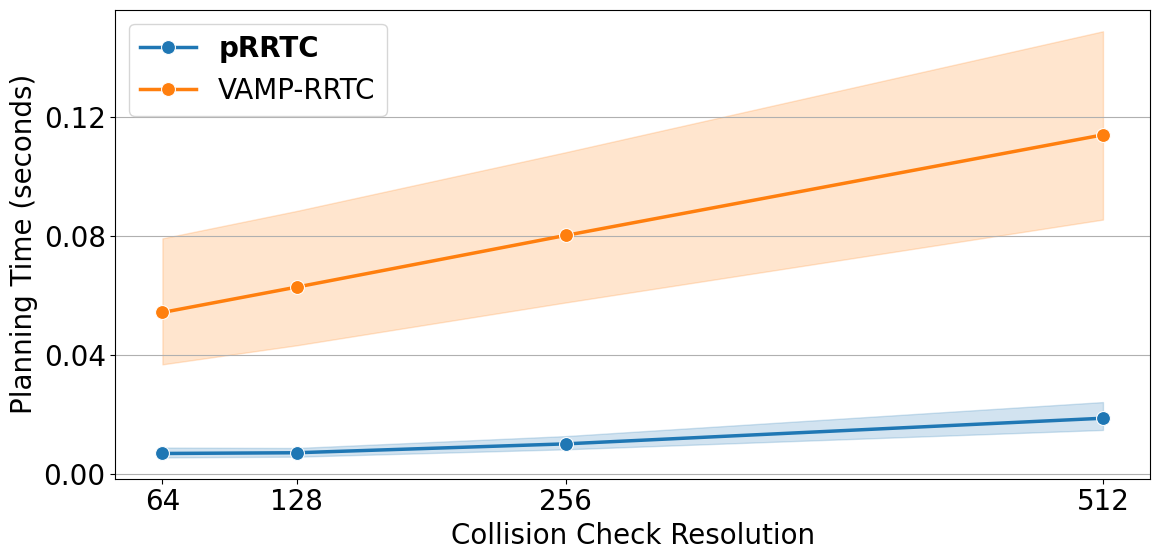

In [74]:
import matplotlib.pyplot as plt

# Set font size globally
plt.rcParams.update({
    'font.size': 20,
    'lines.linewidth': 2.5,
})

# Plot where x-axis is increasing resolution and y-axis is time for pRRTC and VAMP on fetch

prrtc_data_paths = [
    # "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_64_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    # "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_98_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_128_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_256_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
]

vamp_data_paths = [
    # "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv",
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution64.csv",
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution128.csv",
    # "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution196.csv",
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution256.csv",
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution512.csv",
]

prrtc_data = pd.concat([pd.read_csv(path) for path in prrtc_data_paths])
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data["resolution"] = prrtc_data["granularity"] * 2
# prrtc_data = prrtc_data[prrtc_data["problem_name"] == "table_pick"]
prrtc_data["planning_s"] = prrtc_data["kernel_copy_us"] / 1e6
prrtc_data["planner"] = "pRRTC"

vamp_data = pd.DataFrame()
for i, path in enumerate(vamp_data_paths):
    df = pd.read_csv(path)
    df["resolution"] = int(path.split("resolution")[1].split(".csv")[0])
    vamp_data = pd.concat([vamp_data, df])
# vamp_data = vamp_data[vamp_data["problem_name"] == "table_pick"]
vamp_data["planning_s"] = vamp_data["planning_time"] / 1e6
vamp_data["planner"] = "VAMP-RRTC"

combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)

palette = "tab10"
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

problem_data = combined_data[combined_data["problem_name"] == "cage"]
    
# Plot the data
sns.lineplot(data=problem_data, x="resolution", y="planning_s", hue="planner", palette=palette, marker="o", markersize=10, ax=ax, hue_order=["pRRTC", "VAMP-RRTC"],errorbar=('ci', 99))
ax.set_xticks(problem_data["resolution"].unique())
ax.legend(title="")
leg = ax.legend(title="")
for text in leg.get_texts():
    text.set_fontweight('bold')
    break
# ax.set_title(f"Fetch Planning Time with increasing resolution on cage")
ax.set_xlabel("Collision Check Resolution")
ax.set_ylabel("Planning Time (seconds)")
# ax[i].set_yscale("log")
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.grid(True)
ax.set_xticks(problem_data["resolution"].unique())

plt.tight_layout()

In [77]:
# prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_16_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
# vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution32.csv"


prrtc_data_path = "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_256_0.5_2_1.0_1_4.0_1.0_0.0001.csv"
vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution512.csv"


prrtc_512_data = pd.read_csv(prrtc_data_path)
prrtc_512_data["kernel_us"] = prrtc_512_data["kernel_ns"] / 1000
prrtc_512_data["wall_us"] = prrtc_512_data["wall_ns"] / 1000
prrtc_512_data["copy_us"] = prrtc_512_data["copy_ns"] / 1000
prrtc_512_data["kernel_copy_us"] = prrtc_512_data["kernel_us"] + prrtc_512_data["copy_us"]
prrtc_512_data["planner"] = "pRRTC"
prrtc_512_data["planning_us"] = prrtc_512_data["kernel_copy_us"]
prrtc_512_data = prrtc_512_data[prrtc_512_data["problem_name"] == "cage"]
vamp_512_data = pd.read_csv(vamp_data_path)
vamp_512_data["planner"] = "VAMP-RRTC"
vamp_512_data["planning_us"] = vamp_512_data["planning_time"]
vamp_512_data["cost"] = vamp_512_data["initial_path_cost"]
vamp_512_data = vamp_512_data[vamp_512_data["problem_name"] == "cage"]
combined = pd.concat([prrtc_512_data, vamp_512_data], ignore_index=True)
c = combined.groupby("planner")[[ "planning_us", "cost"]].mean()
print(c.loc["VAMP-RRTC"]["planning_us"] / c.loc["pRRTC"]["planning_us"], c.loc["VAMP-RRTC"]["cost"] / c.loc["pRRTC"]["cost"])


6.057890464227178 1.1664603305265446


In [ ]:

vamp_data_path = "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution512.csv"
vamp_512_data = pd.read_csv(vamp_data_path)
vamp_512_data["planner"] = "VAMP-RRTC"
vamp_512_data["planning_us"] = vamp_512_data["planning_time"]
print(vamp_512_data["planning_us"].mean() / 1e6)

0.028673224092783507


In [53]:
13.85/4.23

3.274231678486997

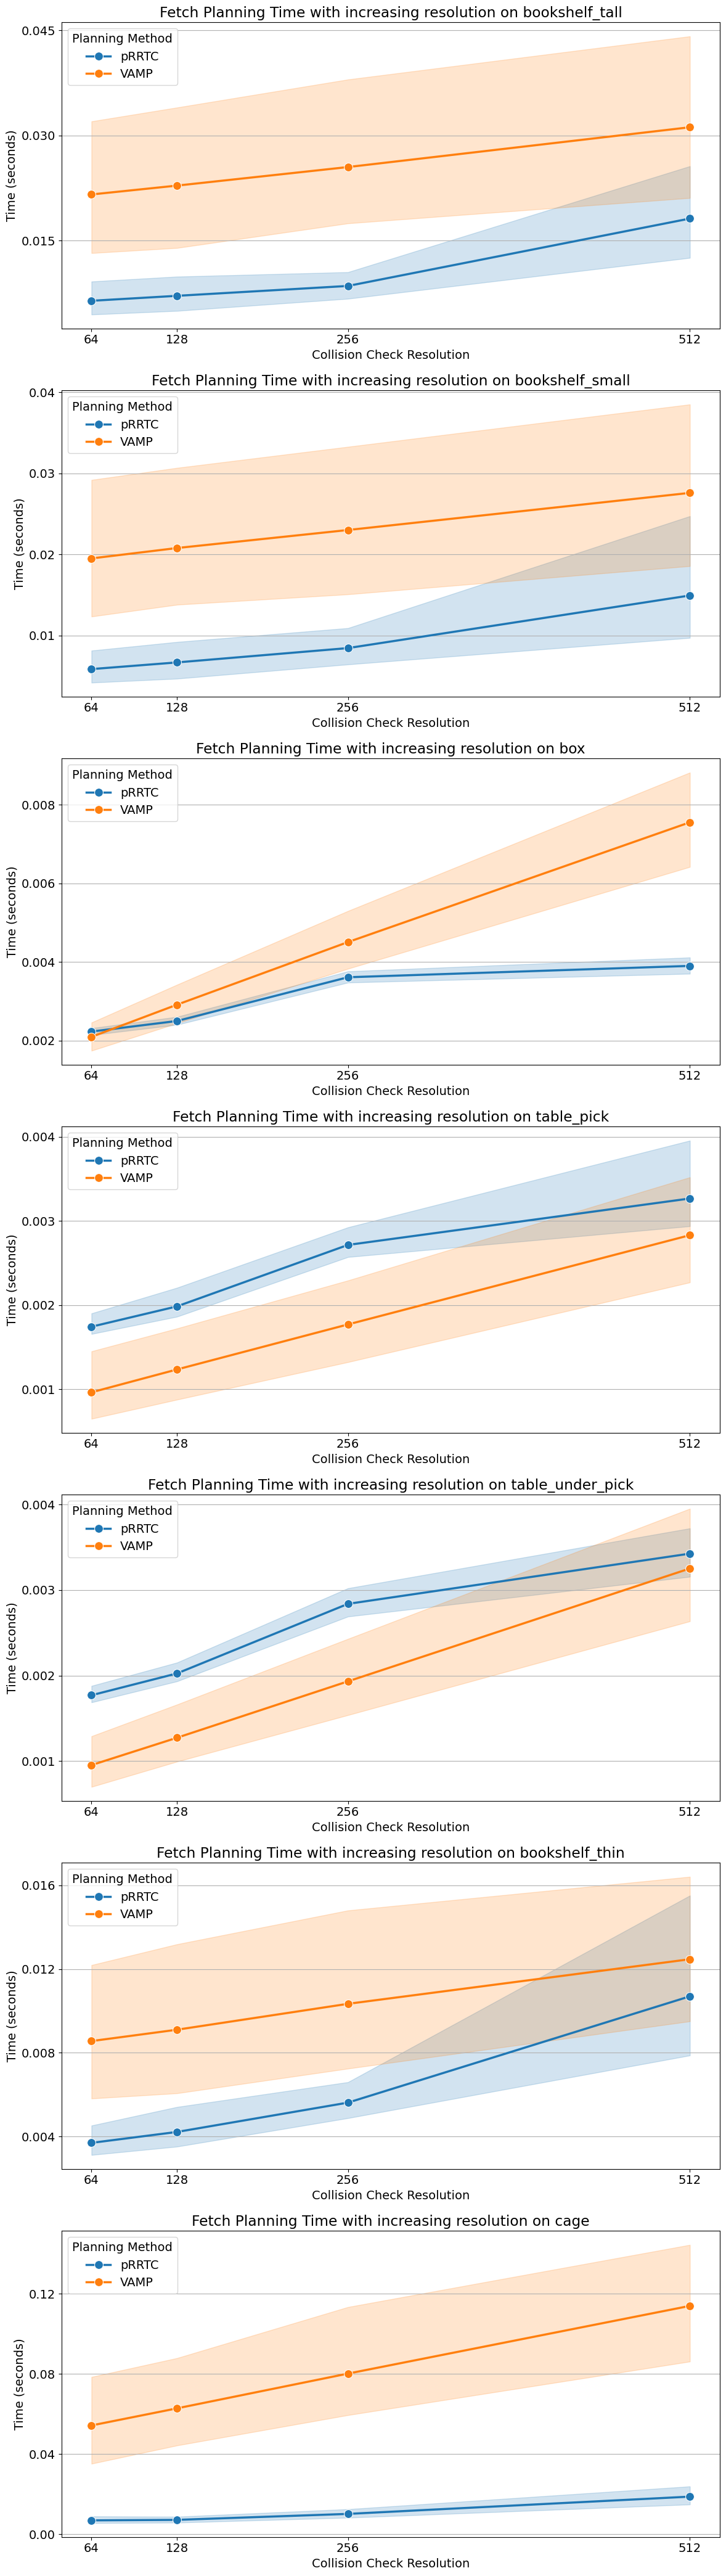

In [42]:
import matplotlib.pyplot as plt

# Set font size globally
plt.rcParams.update({'font.size': 14})

# Plot where x-axis is increasing resolution and y-axis is time for pRRTC and VAMP on fetch

prrtc_data_paths = [
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_32_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_64_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    # "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_98_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_128_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
    "/home/pranav/gpu-planning/paraplan/test_output/fetch_pRRTC_512_256_0.5_2_1.0_1_4.0_1.0_0.0001.csv",
]

vamp_data_paths = [
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution64.csv",
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution128.csv",
    # "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution196.csv",
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution256.csv",
    "/home/pranav/gpu-planning/vamp/results_fetch_rrtc_r0.5_iters1e10_resolution512.csv",
]

prrtc_data = pd.concat([pd.read_csv(path) for path in prrtc_data_paths])
prrtc_data["kernel_us"] = prrtc_data["kernel_ns"] / 1000
prrtc_data["wall_us"] = prrtc_data["wall_ns"] / 1000
prrtc_data["copy_us"] = prrtc_data["copy_ns"] / 1000
prrtc_data["kernel_copy_us"] = prrtc_data["kernel_us"] + prrtc_data["copy_us"]
prrtc_data["resolution"] = prrtc_data["granularity"] * 2
# prrtc_data = prrtc_data[prrtc_data["problem_name"] == "table_pick"]
prrtc_data["planning_s"] = prrtc_data["kernel_copy_us"] / 1e6
prrtc_data["planner"] = "pRRTC"

vamp_data = pd.DataFrame()
for i, path in enumerate(vamp_data_paths):
    df = pd.read_csv(path)
    df["resolution"] = int(path.split("resolution")[1].split(".csv")[0])
    vamp_data = pd.concat([vamp_data, df])
# vamp_data = vamp_data[vamp_data["problem_name"] == "table_pick"]
vamp_data["planning_s"] = vamp_data["planning_time"] / 1e6
vamp_data["planner"] = "VAMP"

combined_data = pd.concat([vamp_data, prrtc_data], ignore_index=True)

palette = "tab10"
fig, ax = plt.subplots(7, 1, figsize=(12, 42))
for i, problem_name in enumerate(combined_data["problem_name"].unique()):
    # Filter data for the current problem name
    problem_data = combined_data[combined_data["problem_name"] == problem_name]
    
    # Plot the data
    sns.lineplot(data=problem_data, x="resolution", y="planning_s", hue="planner", palette=palette, errorbar=('ci', 99), marker="o", markersize=10, ax=ax[i], hue_order=["pRRTC", "VAMP"])
    ax[i].set_xticks(problem_data["resolution"].unique())
    ax[i].legend(title="Planning Method")
    ax[i].set_title(f"Fetch Planning Time with increasing resolution on {problem_name}")
    ax[i].set_xlabel("Collision Check Resolution")
    ax[i].set_ylabel("Time (seconds)")
    # ax[i].set_yscale("log")
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].yaxis.grid(True)
    ax[i].set_xticks(problem_data["resolution"].unique())

plt.tight_layout()

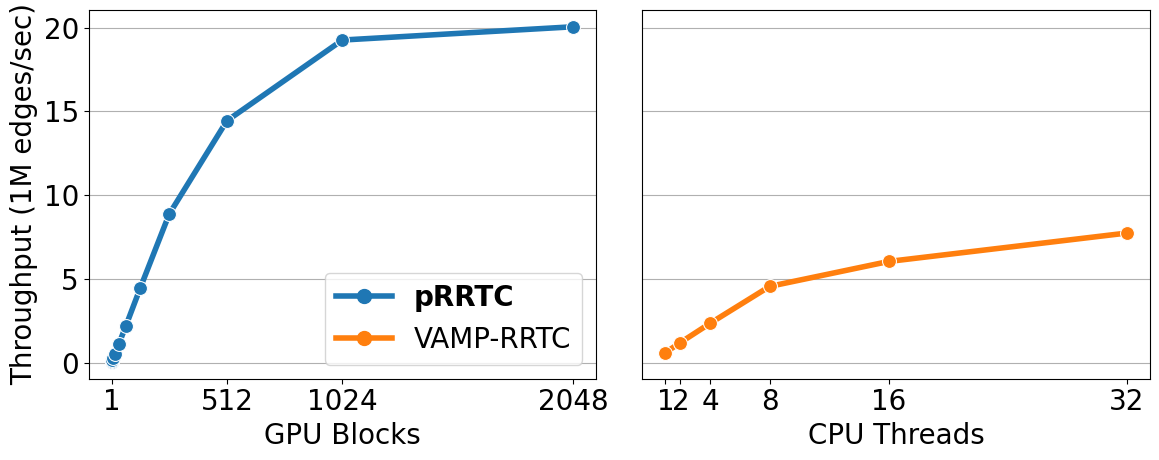

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams.update({
    'font.size': 20,
    'lines.linewidth': 4.0,
})
# Data provided
blocks_data = [
    (1, 33890.9),
    (2, 67728.1),
    (4, 123162),
    (8, 258392),
    (16, 509699),
    (32, 1.08651e6),
    (64, 2.19589e6),
    (128, 4.46705e6),
    (256, 8.86807e6),
    (512, 1.44409e7),
    (1024, 1.92621e7),
    (2048, 2.00556e7),
    # (4096, 2.01729e7),
]

# Data for Threads and Throughput
threads_data = [
    (1, 594359.9134003567),
    (2, 1191288.827690885),
    (4, 2343218.7950739437),
    (8, 4547167.863979067),
    (16, 6037183.128433273),
    (32, 7734328.654901529),
]

threads_df = pd.DataFrame(threads_data, columns=["CPU Threads", "Throughput (edges/sec)"])
blocks_df = pd.DataFrame(blocks_data, columns=["GPU Blocks", "Throughput (edges/sec)"])

threads_df["Throughput (1M edges/sec)"] = threads_df["Throughput (edges/sec)"] / 1e6
blocks_df["Throughput (1M edges/sec)"] = blocks_df["Throughput (edges/sec)"] / 1e6

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.lineplot(data=blocks_df, x="GPU Blocks", y="Throughput (1M edges/sec)", marker="o", ax=ax[0], color="tab:blue", markersize=10)
ax[0].set_xticks([1, 512, 1024, 2048])
ax[0].yaxis.grid(True)

sns.lineplot(data=threads_df, x="CPU Threads", y="Throughput (1M edges/sec)", marker="o", ax=ax[1], color="tab:orange", markersize=10)
ax[1].set_xticks(threads_df["CPU Threads"].unique())
ax[1].yaxis.grid(True)
ax[1].tick_params(axis='y', which='both', left=False, right=False)
# Manually create legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='tab:blue', lw=4, marker='o', markersize=10, label='pRRTC'),
                   Line2D([0], [0], color='tab:orange', lw=4, marker='o', markersize=10, label='VAMP-RRTC')]
ax[0].legend(handles=legend_elements, title="")
for text in ax[0].get_legend().get_texts():
    text.set_fontweight('bold')
    break
plt.tight_layout()
